In [1]:
# !pip list
# import splitfolders
# splitfolders.ratio('./newDogAndCat', output="./Output", seed=1, ratio=(0.8, 0.2))

# Data preperation

In [2]:
from torchvision import datasets
from torchvision import transforms
from torchvision.transforms.transforms import RandomRotation
from torchvision.transforms.functional_pil import rotate
from torch.utils.data import ConcatDataset
# Augmentation = transforms.Compose([
#     transforms.Resize(size = (256, 256)),
#     transforms.RandomHorizontalFlip(),
#     transforms.RandomRotation(45),
#     transforms.CenterCrop(10),
#     transforms.ColorJitter(brightness=.5, hue=.3),
#     transforms.GaussianBlur(kernel_size=(5, 9), sigma=(0.1, 5)),
#     transforms.ToTensor()
# ])

Augmentation_Flip = transforms.Compose([
    transforms.Resize(size = (256, 256)),
    transforms.RandomHorizontalFlip(),
    transforms.ToTensor()
])

Augmentation_Rotae = transforms.Compose([
    transforms.Resize(size = (256, 256)),
    transforms.RandomRotation(45),
    transforms.ToTensor()
])

Augmentation_Crop = transforms.Compose([
    transforms.CenterCrop(100),
    transforms.Resize(size = (256, 256)),
    transforms.ToTensor()
])

Augmentation_Color = transforms.Compose([
    transforms.Resize(size = (256, 256)),
    transforms.ColorJitter(brightness=.5, hue=.3),
    transforms.ToTensor()
])

Augmentation_Blur = transforms.Compose([
    transforms.Resize(size = (256, 256)),
    transforms.GaussianBlur(kernel_size=(5, 9), sigma=(0.1, 5)),
    transforms.ToTensor()
])

Resize_Only = transforms.Compose([
    transforms.Resize(size = (256, 256)),
    transforms.ToTensor()
])

Flip_dataset = datasets.ImageFolder(
    root="./Output/train", 
    transform = Augmentation_Flip)

Rotae_dataset = datasets.ImageFolder(
    root="./Output/train", 
    transform = Augmentation_Rotae)

Crop_dataset = datasets.ImageFolder(
    root="./Output/train", 
    transform = Augmentation_Crop)

Color_dataset = datasets.ImageFolder(
    root="./Output/train", 
    transform = Augmentation_Color)

Blur_dataset = datasets.ImageFolder(
    root="./Output/train", 
    transform = Augmentation_Blur)

Train_Dataset = datasets.ImageFolder(
    root="./Output/train", 
    transform = Resize_Only)

Concat_Flip = ConcatDataset([Train_Dataset, Flip_dataset])
Concat_Rotae = ConcatDataset([Train_Dataset, Rotae_dataset])
Concat_Crop = ConcatDataset([Train_Dataset, Crop_dataset])
Concat_Color = ConcatDataset([Train_Dataset, Color_dataset])
Concat_Blur = ConcatDataset([Train_Dataset, Blur_dataset])

Test_Dataset = datasets.ImageFolder(
    root="./Output/val", 
    transform = Resize_Only)

In [3]:
print(len(Train_Dataset))
print(len(Test_Dataset))

3840
960


In [4]:
import torch
import torch.nn as nn
# set seed
torch.manual_seed(2)
# Load Augmentated Train Data into a DataLoader
Flip_Train_Loader = torch.utils.data.DataLoader(
  dataset = Concat_Flip,
  batch_size = 8,
  shuffle = True,
  )

Rotate_Train_Loader = torch.utils.data.DataLoader(
  dataset = Concat_Rotae,
  batch_size = 8,
  shuffle = True,
  )

Crop_Train_Loader = torch.utils.data.DataLoader(
  dataset = Concat_Crop,
  batch_size = 8,
  shuffle = True,
  )

Color_Train_Loader = torch.utils.data.DataLoader(
  dataset = Concat_Color,
  batch_size = 8,
  shuffle = True,
  )

Blur_Train_Loader = torch.utils.data.DataLoader(
  dataset = Concat_Blur,
  batch_size = 8,
  shuffle = True,
  )

# Load Orignal Train Data into a DataLoader
Orignal_Train_Loader = torch.utils.data.DataLoader(
  dataset = Train_Dataset, 
  batch_size = 8,  
  shuffle = True  
)

# Load Test Data into a DataLoader
Animal_test_loader = torch.utils.data.DataLoader(
  dataset = Test_Dataset, 
  batch_size = 8,  # Make sure this matches with the training dimension
  shuffle = False  # Avoid shuffling.
)

In [5]:
# Check the batch dimensions established with the loader.
for images, labels in Flip_Train_Loader:  
  print(f'Train Image Batch Shape: {images.shape}')
  print(f'Train Image Label Shape: {labels.shape}')
  # Just get a single iteration, no need to check multiple values
  break

for images, labels in Rotate_Train_Loader:  
  print(f'Train Image Batch Shape: {images.shape}')
  print(f'Train Image Label Shape: {labels.shape}')
  # Just get a single iteration, no need to check multiple values
  break

for images, labels in Crop_Train_Loader:  
  print(f'Train Image Batch Shape: {images.shape}')
  print(f'Train Image Label Shape: {labels.shape}')
  # Just get a single iteration, no need to check multiple values
  break

for images, labels in Color_Train_Loader:  
  print(f'Train Image Batch Shape: {images.shape}')
  print(f'Train Image Label Shape: {labels.shape}')
  # Just get a single iteration, no need to check multiple values
  break

for images, labels in Blur_Train_Loader:  
  print(f'Train Image Batch Shape: {images.shape}')
  print(f'Train Image Label Shape: {labels.shape}')
  # Just get a single iteration, no need to check multiple values
  break


for images, labels in Orignal_Train_Loader:  
  print(f'Train Image Batch Shape: {images.shape}')
  print(f'Train Image Label Shape: {labels.shape}')
  # Just get a single iteration, no need to check multiple values
  break

for images, labels in Animal_test_loader:  
  print(f'Test Image Batch Shape: {images.shape}')
  print(f'Test Image Label Shape: {labels.shape}')
  # Just get a single iteration, no need to check multiple values
  break

Train Image Batch Shape: torch.Size([8, 3, 256, 256])
Train Image Label Shape: torch.Size([8])
Train Image Batch Shape: torch.Size([8, 3, 256, 256])
Train Image Label Shape: torch.Size([8])
Train Image Batch Shape: torch.Size([8, 3, 256, 256])
Train Image Label Shape: torch.Size([8])
Train Image Batch Shape: torch.Size([8, 3, 256, 256])
Train Image Label Shape: torch.Size([8])
Train Image Batch Shape: torch.Size([8, 3, 256, 256])
Train Image Label Shape: torch.Size([8])
Train Image Batch Shape: torch.Size([8, 3, 256, 256])
Train Image Label Shape: torch.Size([8])
Test Image Batch Shape: torch.Size([8, 3, 256, 256])
Test Image Label Shape: torch.Size([8])


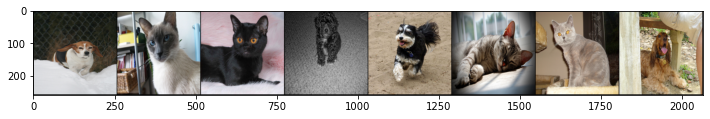

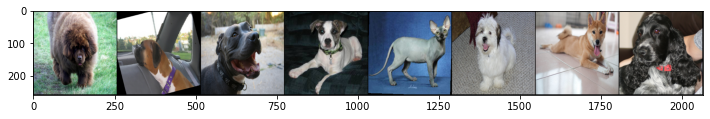

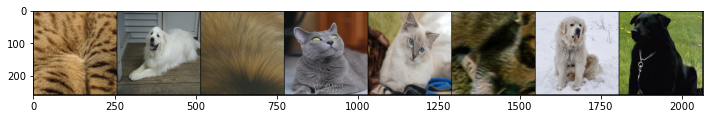

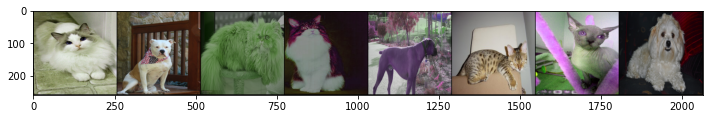

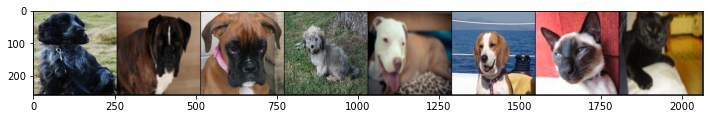

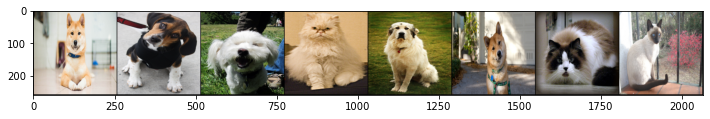

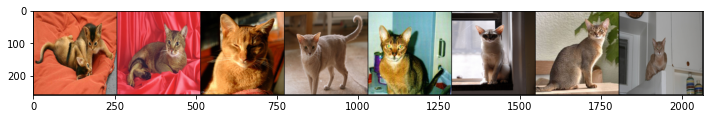

In [6]:
# Construct a graph showing the data transformations
from torchvision.utils import make_grid
import matplotlib.pyplot as plt
import numpy as np

def display_pic(x):
    for images, labels in x:
        fig,ax = plt.subplots(figsize = (12,12))
        ax.imshow(make_grid(images,nrow=8).permute(1,2,0))
        break

display_pic(Flip_Train_Loader)
display_pic(Rotate_Train_Loader)
display_pic(Crop_Train_Loader)
display_pic(Color_Train_Loader)
display_pic(Blur_Train_Loader)
display_pic(Orignal_Train_Loader)
display_pic(Animal_test_loader)

# Model 1

In [6]:
import torch.nn.functional as F 
import torch.optim as optim

class Net(nn.Module): 
    def __init__(self): 
        super().__init__()
        self.conv1 = L1(nn.Conv2d(3, 16, 3), weight_decay = 0.001)
        # we use the maxpool multiple times, but define it once
        self.pool = nn.MaxPool2d(2,2)
        # in_channels = 6 because self.conv1 output 6 channel
        self.conv2 = nn.Conv2d(16, 32, 2) 
        # 5*5 comes from the dimension of the last convnet layer
        self.norm = nn.BatchNorm2d(16)
        self.dropout1 = nn.Dropout2d(0.2)
        self.dropout2 = nn.Dropout(0.5)
        self.fc1 = nn.Linear(32*63*63, 1024) 
        self.fc2 = nn.Linear(1024, 64)
        self.fc3 = nn.Linear(64, 2)
        
    def forward(self, x): 
        x = F.relu(self.conv1(x))
        x = self.norm(x)
        x = self.pool(x)
        x = F.relu(self.conv2(x))
        x = self.pool(x)
        x = self.dropout1(x)
        x = x.view(-1, 32*63*63)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.dropout2(x)
        x = self.fc3(x)  # no activation on final layer 
        return x

class L1(torch.nn.Module):
    def __init__(self, module, weight_decay):
        super().__init__()
        self.module = module
        self.weight_decay = weight_decay

        # Backward hook is registered on the specified module
        self.hook = self.module.register_full_backward_hook(self._weight_decay_hook)

    # Not dependent on backprop incoming values, placeholder
    def _weight_decay_hook(self, *_):
        for param in self.module.parameters():
            # If there is no gradient or it was zeroed out
            # Zeroed out using optimizer.zero_grad() usually
            # Turn on if needed with grad accumulation/more safer way
            # if param.grad is None or torch.all(param.grad == 0.0):

            # Apply regularization on it
            param.grad = self.regularize(param)

    def regularize(self, parameter):
        # L1 regularization formula
        return self.weight_decay * torch.sign(parameter.data)

    def forward(self, *args, **kwargs):
        # Simply forward and args and kwargs to module
        return self.module(*args, **kwargs)

## Flip

In [7]:
# set seed
torch.manual_seed(2)
torch.backends.cudnn.benchmark = False
torch.backends.cudnn.deterministic = True
Net_Flip = Net()

# move the model to GPU for speed if available
if torch.cuda.is_available():
  Net_Flip.to('cuda')

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(Net_Flip.parameters(), lr=0.01, momentum=0.8, weight_decay = 0.013)

0 10 0.7510173976421356
0 20 0.7438345849514008
0 30 0.6958319902420044
0 40 0.698887974023819
0 50 0.7001171827316284
0 60 0.6956581234931946
0 70 0.6968047976493835
0 80 0.6947267532348633
0 90 0.6889729022979736
0 100 0.6978278040885926
0 110 0.6952322959899903
0 120 0.6945150852203369
0 130 0.7072617769241333
0 140 0.6899883985519409
0 150 0.6945378184318542
0 160 0.6845957338809967
0 170 0.6859723567962647
0 180 0.6560655415058136
0 190 0.701025003194809
0 200 0.7033893942832947
0 210 0.6966640591621399
0 220 0.697086626291275
0 230 0.6939102470874786
0 240 0.6958700895309449
0 250 0.6944620907306671
0 260 0.6941666007041931
0 270 0.6947951853275299
0 280 0.6868173837661743
0 290 0.6985303461551666
0 300 0.6931694447994232
0 310 0.6885712683200836
0 320 0.7018166363239289
0 330 0.6893981218338012
0 340 0.6971348226070404
0 350 0.6919300436973572
0 360 0.6913219451904297
0 370 0.6953081667423249
0 380 0.6932853043079377
0 390 0.6963472664356232
0 400 0.6970268130302429
0 410 0.6917

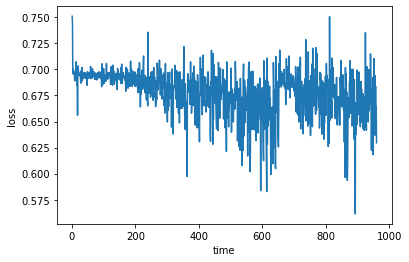

In [8]:
running_loss = 0 
printfreq = 10
l = []
t = []
k = 0
test_accu = []
train_accu = []

for epoch in range(10):
    for i, data in enumerate(Flip_Train_Loader):
        inputs, labels = data
        inputs = inputs.to('cuda')
        labels = labels.to('cuda')
        optimizer.zero_grad()
        outputs = Net_Flip(inputs)  # forward pass 
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        if i % printfreq == printfreq-1:  
            print(epoch, i+1, running_loss / printfreq)
            k = k + 1
            l.append(running_loss / printfreq)
            t.append(k)
            running_loss = 0 

    total_test = 0  # keeps track of how many images we have processed 
    correct_test = 0  # keeps track of how many correct images our net predicts
    fname = './Model_all/seed2/Net_Flip' + str(epoch) + '.pth'
    torch.save(Net_Flip.state_dict(), fname)
    loaded_dict = torch.load(fname)
    Net_Flip.load_state_dict(loaded_dict)
    with torch.no_grad():
      for i, data in enumerate(Animal_test_loader): 
        images, labels = data
        images = images.to('cuda')
        labels = labels.to('cuda')
        outputs = Net_Flip(images)
        _, predicted = torch.max(outputs.data, 1)
        total_test += labels.size()[0]
        correct_test += (predicted == labels).sum().item()
        
    test_accu.append(correct_test/total_test)

    total_train = 0  # keeps track of how many images we have processed 
    correct_train = 0  # keeps track of how many correct images our net predicts
    with torch.no_grad():
      for i, data in enumerate(Flip_Train_Loader): 
        images, labels = data
        images = images.to('cuda')
        labels = labels.to('cuda')
        outputs = Net_Flip(images)
        _, predicted = torch.max(outputs.data, 1)
        total_train += labels.size()[0]
        correct_train += (predicted == labels).sum().item()
        
    train_accu.append(correct_train/total_train)
# plotting
l = np.array(l)
t = np.array(t)
plt.plot(t, l)
plt.xlabel("time")
plt.ylabel("loss")
plt.show()

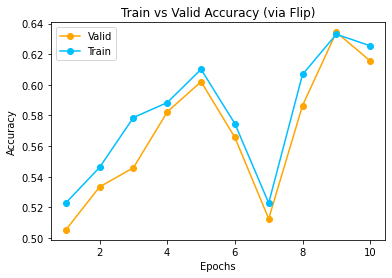

In [9]:
epoch = range(1, len(test_accu) + 1)
test_accu_flip_m1 = test_accu
train_accu_flip_m1 = train_accu
plt.title("Train vs Valid Accuracy (via Flip)")
plt.plot(epoch, test_accu_flip_m1, marker='o', color='orange', label='Valid')
plt.plot(epoch, train_accu_flip_m1, marker='o', color='deepskyblue', label='Train')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

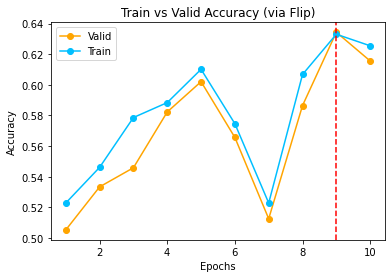

In [10]:
plt.title("Train vs Valid Accuracy (via Flip)")
plt.plot(epoch, test_accu_flip_m1, marker='o', color='orange', label='Valid')
plt.plot(epoch, train_accu_flip_m1, marker='o', color='deepskyblue', label='Train')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.axvline(x=test_accu_flip_m1.index(max(test_accu_flip_m1))+1, color='r', linestyle='--')
plt.show()

In [11]:
print(f'Train accuracy iteration: {train_accu_flip_m1}')
print(f'Test accuracy iteration: {test_accu_flip_m1}')

Train accuracy iteration: [0.5227864583333334, 0.54609375, 0.5786458333333333, 0.5884114583333333, 0.61015625, 0.574609375, 0.5227864583333334, 0.6067708333333334, 0.6330729166666667, 0.6255208333333333]
Test accuracy iteration: [0.5052083333333334, 0.5333333333333333, 0.5458333333333333, 0.5822916666666667, 0.6020833333333333, 0.565625, 0.5125, 0.5864583333333333, 0.634375, 0.615625]


## Rotate

In [12]:
# set seed
torch.manual_seed(2)
torch.backends.cudnn.benchmark = False
torch.backends.cudnn.deterministic = True
Net_Rotate = Net()

# move the model to GPU for speed if available
if torch.cuda.is_available():
  Net_Rotate.to('cuda')

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(Net_Rotate.parameters(), lr=0.01, momentum=0.8)

0 10 0.8146811306476593
0 20 0.7471597611904144
0 30 0.7041502594947815
0 40 0.6967495858669281
0 50 0.6960646390914917
0 60 0.692747849225998
0 70 0.6984588742256165
0 80 0.6977344751358032
0 90 0.6859565198421478
0 100 0.697707611322403
0 110 0.6986767768859863
0 120 0.6769049167633057
0 130 0.7241977512836456
0 140 0.6936854660511017
0 150 0.6951816558837891
0 160 0.6768870651721954
0 170 0.67349893450737
0 180 0.6002471774816514
0 190 0.7278193771839142
0 200 0.6954715311527252
0 210 0.687623244524002
0 220 0.7028256595134735
0 230 0.6938620746135712
0 240 0.6935221970081329
0 250 0.6929974257946014
0 260 0.6914156556129456
0 270 0.6926712691783905
0 280 0.6776146531105042
0 290 0.7068035066127777
0 300 0.6915037512779236
0 310 0.6845962584018708
0 320 0.6936044096946716
0 330 0.6859875321388245
0 340 0.6829914331436158
0 350 0.7060129165649414
0 360 0.6941100478172302
0 370 0.6967978954315186
0 380 0.6956937491893769
0 390 0.6931915521621704
0 400 0.6994931101799011
0 410 0.691134

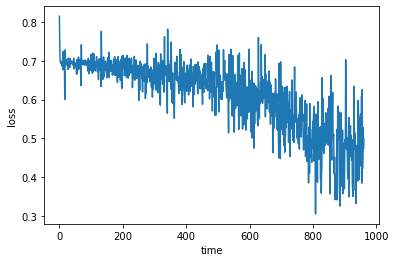

In [13]:
running_loss = 0 
printfreq = 10
l = []
t = []
k = 0
test_accu = []
train_accu = []

for epoch in range(10):
    for i, data in enumerate(Rotate_Train_Loader):
        inputs, labels = data
        inputs = inputs.to('cuda')
        labels = labels.to('cuda')
        optimizer.zero_grad()
        outputs = Net_Rotate(inputs)  # forward pass 
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        if i % printfreq == printfreq-1:  
            print(epoch, i+1, running_loss / printfreq)
            k = k + 1
            l.append(running_loss / printfreq)
            t.append(k)
            running_loss = 0 

    total_test = 0  # keeps track of how many images we have processed 
    correct_test = 0  # keeps track of how many correct images our net predicts
    fname = './Model_all/seed2/Net_Rotate' + str(epoch) + '.pth'
    torch.save(Net_Rotate.state_dict(), fname)
    loaded_dict = torch.load(fname)
    Net_Rotate.load_state_dict(loaded_dict)
    with torch.no_grad():
      for i, data in enumerate(Animal_test_loader): 
        images, labels = data
        images = images.to('cuda')
        labels = labels.to('cuda')
        outputs = Net_Rotate(images)
        _, predicted = torch.max(outputs.data, 1)
        total_test += labels.size()[0]
        correct_test += (predicted == labels).sum().item()
        
    test_accu.append(correct_test/total_test)

    total_train = 0  # keeps track of how many images we have processed 
    correct_train = 0  # keeps track of how many correct images our net predicts
    with torch.no_grad():
      for i, data in enumerate(Rotate_Train_Loader): 
        images, labels = data
        images = images.to('cuda')
        labels = labels.to('cuda')
        outputs = Net_Rotate(images)
        _, predicted = torch.max(outputs.data, 1)
        total_train += labels.size()[0]
        correct_train += (predicted == labels).sum().item()
        
    train_accu.append(correct_train/total_train)
# plotting
l = np.array(l)
t = np.array(t)
plt.plot(t, l)
plt.xlabel("time")
plt.ylabel("loss")
plt.show()

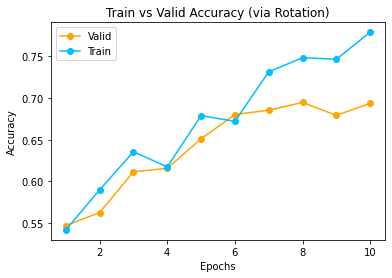

In [14]:
epoch = range(1, len(test_accu) + 1)
test_accu_rotate_m1 = test_accu
train_accu_rotate_m1 = train_accu
plt.title("Train vs Valid Accuracy (via Rotation)")
plt.plot(epoch, test_accu_rotate_m1, marker='o', color='orange', label='Valid')
plt.plot(epoch, train_accu_rotate_m1, marker='o', color='deepskyblue', label='Train')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

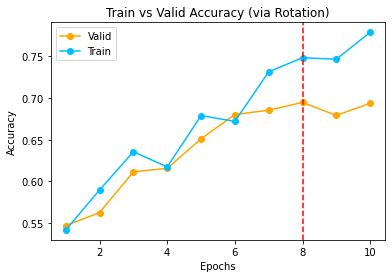

In [15]:
plt.title("Train vs Valid Accuracy (via Rotation)")
plt.plot(epoch, test_accu_rotate_m1, marker='o', color='orange', label='Valid')
plt.plot(epoch, train_accu_rotate_m1, marker='o', color='deepskyblue', label='Train')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.axvline(x=test_accu_rotate_m1.index(max(test_accu_rotate_m1))+1, color='r', linestyle='--')
plt.show()

In [16]:
print(f'Train accuracy iteration: {train_accu_rotate_m1}')
print(f'Test accuracy iteration: {test_accu_rotate_m1}')

Train accuracy iteration: [0.5416666666666666, 0.5897135416666667, 0.635546875, 0.6173177083333333, 0.67890625, 0.6720052083333333, 0.7315104166666667, 0.7484375, 0.7466145833333333, 0.7790364583333333]
Test accuracy iteration: [0.546875, 0.5625, 0.6114583333333333, 0.615625, 0.6510416666666666, 0.6802083333333333, 0.6854166666666667, 0.6947916666666667, 0.6791666666666667, 0.69375]


## Crop

In [17]:
# set seed
torch.manual_seed(2)
torch.backends.cudnn.benchmark = False
torch.backends.cudnn.deterministic = True
Net_Crop = Net()

# move the model to GPU for speed if available
if torch.cuda.is_available():
  Net_Crop.to('cuda')

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(Net_Crop.parameters(), lr=0.01, momentum=0.8)

0 10 0.7517354965209961
0 20 0.7812516033649445
0 30 0.7080071330070495
0 40 0.7021755874156952
0 50 0.6931662857532501
0 60 0.6965593159198761
0 70 0.6808435618877411
0 80 0.7344885110855103
0 90 0.6926395952701568
0 100 0.6992276608943939
0 110 0.6958645761013031
0 120 0.6981315016746521
0 130 0.6907743632793426
0 140 0.6842613875865936
0 150 0.702725738286972
0 160 0.684264475107193
0 170 0.6843891143798828
0 180 0.632142287492752
0 190 0.731977117061615
0 200 0.6979472458362579
0 210 0.6963979959487915
0 220 0.6967577159404754
0 230 0.6922496080398559
0 240 0.6924466192722321
0 250 0.6934724688529968
0 260 0.6925101459026337
0 270 0.6881897568702697
0 280 0.684048855304718
0 290 0.7027179598808289
0 300 0.6957171976566314
0 310 0.6936602056026459
0 320 0.6959775447845459
0 330 0.6814454972743988
0 340 0.6937770128250123
0 350 0.686748081445694
0 360 0.6836044013500213
0 370 0.7012582659721375
0 380 0.71235391497612
0 390 0.6862383186817169
0 400 0.7095365703105927
0 410 0.699183821

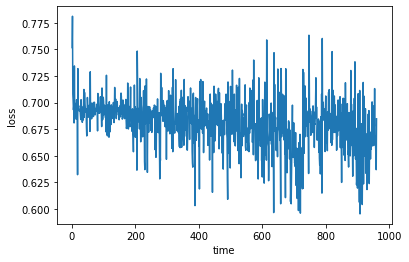

In [18]:
running_loss = 0 
printfreq = 10
l = []
t = []
k = 0
test_accu = []
train_accu = []

for epoch in range(10):
    for i, data in enumerate(Crop_Train_Loader):
        inputs, labels = data
        inputs = inputs.to('cuda')
        labels = labels.to('cuda')
        optimizer.zero_grad()
        outputs = Net_Crop(inputs)  # forward pass 
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        if i % printfreq == printfreq-1:  
            print(epoch, i+1, running_loss / printfreq)
            k = k + 1
            l.append(running_loss / printfreq)
            t.append(k)
            running_loss = 0 

    total_test = 0  # keeps track of how many images we have processed 
    correct_test = 0  # keeps track of how many correct images our net predicts
    fname = './Model_all/seed2/Net_Crop' + str(epoch) + '.pth'
    torch.save(Net_Crop.state_dict(), fname)
    loaded_dict = torch.load(fname)
    Net_Crop.load_state_dict(loaded_dict)
    with torch.no_grad():
      for i, data in enumerate(Animal_test_loader): 
        images, labels = data
        images = images.to('cuda')
        labels = labels.to('cuda')
        outputs = Net_Crop(images)
        _, predicted = torch.max(outputs.data, 1)
        total_test += labels.size()[0]
        correct_test += (predicted == labels).sum().item()
        
    test_accu.append(correct_test/total_test)

    total_train = 0  # keeps track of how many images we have processed 
    correct_train = 0  # keeps track of how many correct images our net predicts
    with torch.no_grad():
      for i, data in enumerate(Crop_Train_Loader): 
        images, labels = data
        images = images.to('cuda')
        labels = labels.to('cuda')
        outputs = Net_Crop(images)
        _, predicted = torch.max(outputs.data, 1)
        total_train += labels.size()[0]
        correct_train += (predicted == labels).sum().item()
        
    train_accu.append(correct_train/total_train)
# plotting
l = np.array(l)
t = np.array(t)
plt.plot(t, l)
plt.xlabel("time")
plt.ylabel("loss")
plt.show()

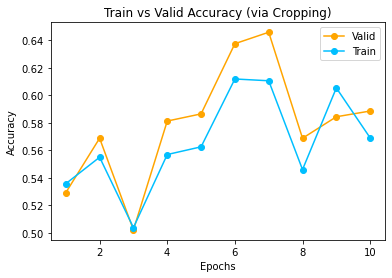

In [19]:
epoch = range(1, len(test_accu) + 1)
test_accu_crop_m1 = test_accu
train_accu_crop_m1= train_accu
plt.title("Train vs Valid Accuracy (via Cropping)")
plt.plot(epoch, test_accu_crop_m1, marker='o', color='orange', label='Valid')
plt.plot(epoch, train_accu_crop_m1, marker='o', color='deepskyblue', label='Train')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

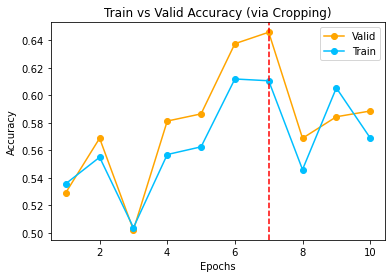

In [20]:
plt.title("Train vs Valid Accuracy (via Cropping)")
plt.plot(epoch, test_accu_crop_m1, marker='o', color='orange', label='Valid')
plt.plot(epoch, train_accu_crop_m1, marker='o', color='deepskyblue', label='Train')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.axvline(x=test_accu_crop_m1.index(max(test_accu_crop_m1))+1, color='r', linestyle='--')
plt.show()

In [21]:
print(f'Train accuracy iteration: {train_accu_crop_m1}')
print(f'Test accuracy iteration: {test_accu_crop_m1}')

Train accuracy iteration: [0.5356770833333333, 0.5549479166666667, 0.5037760416666667, 0.5569010416666667, 0.5625, 0.6118489583333333, 0.610546875, 0.5459635416666667, 0.6053385416666667, 0.5690104166666666]
Test accuracy iteration: [0.5291666666666667, 0.56875, 0.5020833333333333, 0.58125, 0.5864583333333333, 0.6375, 0.6458333333333334, 0.56875, 0.584375, 0.5885416666666666]


## Color

In [22]:
# set seed
torch.manual_seed(2)
torch.backends.cudnn.benchmark = False
torch.backends.cudnn.deterministic = True
Net_Color = Net()

# move the model to GPU for speed if available
if torch.cuda.is_available():
  Net_Color.to('cuda')

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(Net_Color.parameters(), lr=0.01, momentum=0.8, weight_decay = 0.018)

0 10 0.7598307251930236
0 20 0.7347524404525757
0 30 0.70428267121315
0 40 0.6976242303848267
0 50 0.701365303993225
0 60 0.6904973864555359
0 70 0.6975654006004334
0 80 0.7006581604480744
0 90 0.6914015769958496
0 100 0.6968003034591674
0 110 0.6962788105010986
0 120 0.6999547839164734
0 130 0.692423278093338
0 140 0.6875087141990661
0 150 0.6954769134521485
0 160 0.6793401420116425
0 170 0.6856328427791596
0 180 0.6548890948295594
0 190 0.7014285504817963
0 200 0.7036287367343903
0 210 0.6966619551181793
0 220 0.6963903844356537
0 230 0.6939421415328979
0 240 0.6953799188137054
0 250 0.6948437750339508
0 260 0.693168443441391
0 270 0.6926616191864013
0 280 0.6894260823726654
0 290 0.6973601341247558
0 300 0.6949757516384125
0 310 0.6899568200111389
0 320 0.7004158079624176
0 330 0.6903411507606506
0 340 0.696216344833374
0 350 0.6906323432922363
0 360 0.6914028406143189
0 370 0.6948228538036346
0 380 0.6963524997234345
0 390 0.6907087981700897
0 400 0.6967752277851105
0 410 0.6914146

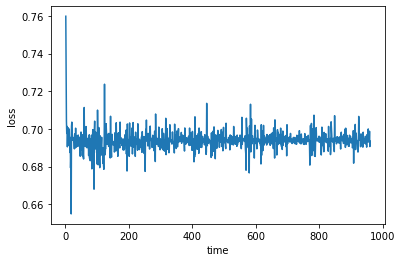

In [23]:
running_loss = 0 
printfreq = 10
l = []
t = []
k = 0
test_accu = []
train_accu = []

for epoch in range(10):
    for i, data in enumerate(Color_Train_Loader):
        inputs, labels = data
        inputs = inputs.to('cuda')
        labels = labels.to('cuda')
        optimizer.zero_grad()
        outputs = Net_Color(inputs)  # forward pass 
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        if i % printfreq == printfreq-1:  
            print(epoch, i+1, running_loss / printfreq)
            k = k + 1
            l.append(running_loss / printfreq)
            t.append(k)
            running_loss = 0 

    total_test = 0  # keeps track of how many images we have processed 
    correct_test = 0  # keeps track of how many correct images our net predicts
    fname = './Model_all/seed2/Net_Color' + str(epoch) + '.pth'
    torch.save(Net_Color.state_dict(), fname)
    loaded_dict = torch.load(fname)
    Net_Color.load_state_dict(loaded_dict)
    with torch.no_grad():
      for i, data in enumerate(Animal_test_loader): 
        images, labels = data
        images = images.to('cuda')
        labels = labels.to('cuda')
        outputs = Net_Color(images)
        _, predicted = torch.max(outputs.data, 1)
        total_test += labels.size()[0]
        correct_test += (predicted == labels).sum().item()
        
    test_accu.append(correct_test/total_test)

    total_train = 0  # keeps track of how many images we have processed 
    correct_train = 0  # keeps track of how many correct images our net predicts
    with torch.no_grad():
      for i, data in enumerate(Color_Train_Loader): 
        images, labels = data
        images = images.to('cuda')
        labels = labels.to('cuda')
        outputs = Net_Color(images)
        _, predicted = torch.max(outputs.data, 1)
        total_train += labels.size()[0]
        correct_train += (predicted == labels).sum().item()
        
    train_accu.append(correct_train/total_train)
# plotting
l = np.array(l)
t = np.array(t)
plt.plot(t, l)
plt.xlabel("time")
plt.ylabel("loss")
plt.show()

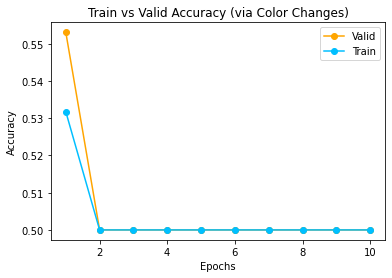

In [24]:
epoch = range(1, len(test_accu) + 1)
test_accu_color_m1 = test_accu
train_accu_color_m1 = train_accu
plt.title("Train vs Valid Accuracy (via Color Changes)")
plt.plot(epoch, test_accu_color_m1, marker='o', color='orange', label='Valid')
plt.plot(epoch, train_accu_color_m1, marker='o', color='deepskyblue', label='Train')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

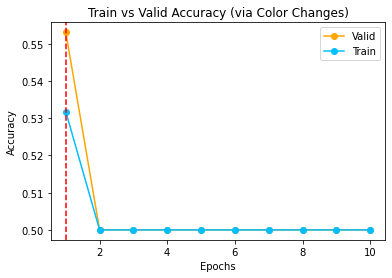

In [25]:
plt.title("Train vs Valid Accuracy (via Color Changes)")
plt.plot(epoch, test_accu_color_m1, marker='o', color='orange', label='Valid')
plt.plot(epoch, train_accu_color_m1, marker='o', color='deepskyblue', label='Train')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.axvline(x=test_accu_color_m1.index(max(test_accu_color_m1))+1, color='r', linestyle='--')
plt.show()

In [26]:
print(f'Train accuracy iteration: {train_accu_color_m1}')
print(f'Test accuracy iteration: {test_accu_color_m1}')

Train accuracy iteration: [0.5317708333333333, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5]
Test accuracy iteration: [0.553125, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5]


## Blur

In [27]:
# set seed
torch.manual_seed(2)
torch.backends.cudnn.benchmark = False
torch.backends.cudnn.deterministic = True
Net_Blur = Net()

# move the model to GPU for speed if available
if torch.cuda.is_available():
  Net_Blur.to('cuda')

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(Net_Blur.parameters(), lr=0.01, momentum=0.8, weight_decay = 0.01)

0 10 0.7156423270702362
0 20 0.767920857667923
0 30 0.7142136812210083
0 40 0.6955061197280884
0 50 0.6973307073116303
0 60 0.6988129258155823
0 70 0.6999029755592346
0 80 0.6965595126152039
0 90 0.6890092194080353
0 100 0.6991729617118836
0 110 0.6963322579860687
0 120 0.6964236617088317
0 130 0.7002241551876068
0 140 0.6885235190391541
0 150 0.6937152504920959
0 160 0.6704500854015351
0 170 0.6867520034313201
0 180 0.6476837217807769
0 190 0.7187115550041199
0 200 0.6966869711875916
0 210 0.6931459248065949
0 220 0.6950522482395172
0 230 0.6932865738868713
0 240 0.6929037153720856
0 250 0.6921662926673889
0 260 0.690818989276886
0 270 0.6895029425621033
0 280 0.6850246489048004
0 290 0.6998517751693726
0 300 0.6943620562553405
0 310 0.6836923778057098
0 320 0.7039146304130555
0 330 0.6831278204917908
0 340 0.6985420882701874
0 350 0.6864265680313111
0 360 0.6781513631343842
0 370 0.7037303686141968
0 380 0.7019956409931183
0 390 0.6850828230381012
0 400 0.6926085352897644
0 410 0.705

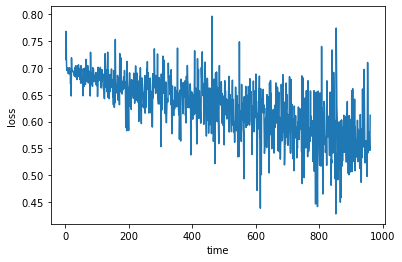

In [28]:
running_loss = 0 
printfreq = 10
l = []
t = []
k = 0
test_accu = []
train_accu = []

for epoch in range(10):
    for i, data in enumerate(Blur_Train_Loader):
        inputs, labels = data
        inputs = inputs.to('cuda')
        labels = labels.to('cuda')
        optimizer.zero_grad()
        outputs = Net_Blur(inputs)  # forward pass 
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        if i % printfreq == printfreq-1:  
            print(epoch, i+1, running_loss / printfreq)
            k = k + 1
            l.append(running_loss / printfreq)
            t.append(k)
            running_loss = 0 

    total_test = 0  # keeps track of how many images we have processed 
    correct_test = 0  # keeps track of how many correct images our net predicts
    fname = './Model_all/seed2/Net_Blur' + str(epoch) + '.pth'
    torch.save(Net_Blur.state_dict(), fname)
    loaded_dict = torch.load(fname)
    Net_Blur.load_state_dict(loaded_dict)
    with torch.no_grad():
      for i, data in enumerate(Animal_test_loader): 
        images, labels = data
        images = images.to('cuda')
        labels = labels.to('cuda')
        outputs = Net_Blur(images)
        _, predicted = torch.max(outputs.data, 1)
        total_test += labels.size()[0]
        correct_test += (predicted == labels).sum().item()
        
    test_accu.append(correct_test/total_test)

    total_train = 0  # keeps track of how many images we have processed 
    correct_train = 0  # keeps track of how many correct images our net predicts
    with torch.no_grad():
      for i, data in enumerate(Blur_Train_Loader): 
        images, labels = data
        images = images.to('cuda')
        labels = labels.to('cuda')
        outputs = Net_Blur(images)
        _, predicted = torch.max(outputs.data, 1)
        total_train += labels.size()[0]
        correct_train += (predicted == labels).sum().item()
        
    train_accu.append(correct_train/total_train)
# plotting
l = np.array(l)
t = np.array(t)
plt.plot(t, l)
plt.xlabel("time")
plt.ylabel("loss")
plt.show()

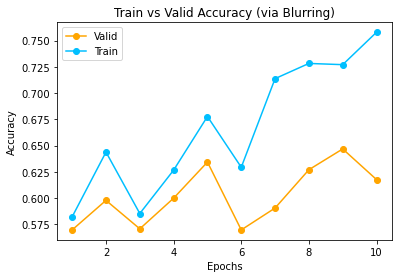

In [29]:
epoch = range(1, len(test_accu) + 1)
test_accu_blur_m1 = test_accu
train_accu_blur_m1 = train_accu
plt.title("Train vs Valid Accuracy (via Blurring)")
plt.plot(epoch, test_accu_blur_m1, marker='o', color='orange', label='Valid')
plt.plot(epoch, train_accu_blur_m1, marker='o', color='deepskyblue', label='Train')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

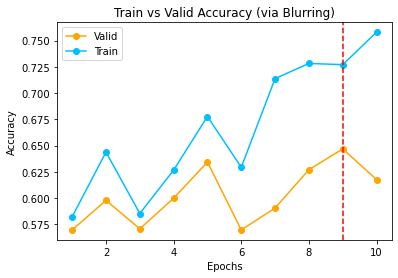

In [30]:
plt.title("Train vs Valid Accuracy (via Blurring)")
plt.plot(epoch, test_accu_blur_m1, marker='o', color='orange', label='Valid')
plt.plot(epoch, train_accu_blur_m1, marker='o', color='deepskyblue', label='Train')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.axvline(x=test_accu_blur_m1.index(max(test_accu_blur_m1))+1, color='r', linestyle='--')
plt.show()

In [31]:
print(f'Train accuracy iteration: {train_accu_blur_m1}')
print(f'Test accuracy iteration: {test_accu_blur_m1}')

Train accuracy iteration: [0.5822916666666667, 0.6438802083333334, 0.5854166666666667, 0.6266927083333333, 0.677734375, 0.6294270833333333, 0.7138020833333333, 0.7282552083333333, 0.7270833333333333, 0.7579427083333333]
Test accuracy iteration: [0.5697916666666667, 0.5979166666666667, 0.5708333333333333, 0.6, 0.634375, 0.5697916666666667, 0.590625, 0.6270833333333333, 0.646875, 0.6177083333333333]


## Orignal

In [32]:
# set seed
torch.manual_seed(2)
torch.backends.cudnn.benchmark = False
torch.backends.cudnn.deterministic = True
Net_Orignal = Net()

# move the model to GPU for speed if available
if torch.cuda.is_available():
  Net_Orignal.to('cuda')

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(Net_Orignal.parameters(), lr=0.01, momentum=0.8, weight_decay = 0.015)

0 10 0.8529999017715454
0 20 0.774129581451416
0 30 0.6865183770656585
0 40 0.6868980228900909
0 50 0.7141767382621765
0 60 0.6950153112411499
0 70 0.7013526082038879
0 80 0.6930931806564331
0 90 0.6916918277740478
0 100 0.6881187438964844
0 110 0.6917633831501007
0 120 0.6737947404384613
0 130 0.7151950120925903
0 140 0.6929242670536041
0 150 0.6795199573040008
0 160 0.6351263344287872
0 170 0.7144058763980865
0 180 0.6780299365520477
0 190 0.7128502070903778
0 200 0.6762618362903595
0 210 0.6927082777023316
0 220 0.7019741415977478
0 230 0.6816675186157226
0 240 0.6927629292011261
0 250 0.6942670702934265
0 260 0.6661870181560516
0 270 0.6759427964687348
0 280 0.7186399459838867
0 290 0.6763760328292847
0 300 0.7024547338485718
0 310 0.6872619330883026
0 320 0.6947296977043151
0 330 0.6892454564571381
0 340 0.6845695972442627
0 350 0.6796297609806061
0 360 0.6743835806846619
0 370 0.6551796317100524
0 380 0.7009512901306152
0 390 0.6721869289875031
0 400 0.6918130040168762
0 410 0.72

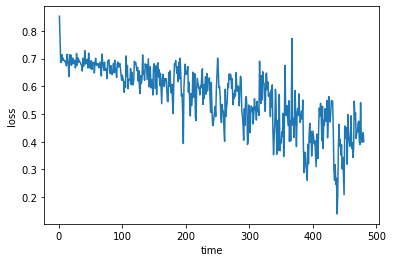

In [33]:
running_loss = 0 
printfreq = 10
l = []
t = []
k = 0
test_accu = []
train_accu = []

for epoch in range(10):
    for i, data in enumerate(Orignal_Train_Loader):
        inputs, labels = data
        inputs = inputs.to('cuda')
        labels = labels.to('cuda')
        optimizer.zero_grad()
        outputs = Net_Orignal(inputs)  # forward pass 
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        if i % printfreq == printfreq-1:  
            print(epoch, i+1, running_loss / printfreq)
            k = k + 1
            l.append(running_loss / printfreq)
            t.append(k)
            running_loss = 0 

    total_test = 0  # keeps track of how many images we have processed 
    correct_test = 0  # keeps track of how many correct images our net predicts
    fname = './Model_all/seed2/Net_Orignal' + str(epoch) + '.pth'
    torch.save(Net_Orignal.state_dict(), fname)
    loaded_dict = torch.load(fname)
    Net_Orignal.load_state_dict(loaded_dict)
    with torch.no_grad():
      for i, data in enumerate(Animal_test_loader): 
        images, labels = data
        images = images.to('cuda')
        labels = labels.to('cuda')
        outputs = Net_Orignal(images)
        _, predicted = torch.max(outputs.data, 1)
        total_test += labels.size()[0]
        correct_test += (predicted == labels).sum().item()
        
    test_accu.append(correct_test/total_test)

    total_train = 0  # keeps track of how many images we have processed 
    correct_train = 0  # keeps track of how many correct images our net predicts
    with torch.no_grad():
      for i, data in enumerate(Orignal_Train_Loader): 
        images, labels = data
        images = images.to('cuda')
        labels = labels.to('cuda')
        outputs = Net_Orignal(images)
        _, predicted = torch.max(outputs.data, 1)
        total_train += labels.size()[0]
        correct_train += (predicted == labels).sum().item()
        
    train_accu.append(correct_train/total_train)
# plotting
l = np.array(l)
t = np.array(t)
plt.plot(t, l)
plt.xlabel("time")
plt.ylabel("loss")
plt.show()

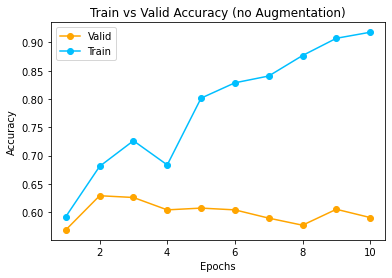

In [34]:
epoch = range(1, len(test_accu) + 1)
test_accu_orignal_m1 = test_accu
train_accu_orignal_m1 = train_accu
plt.title("Train vs Valid Accuracy (no Augmentation)")
plt.plot(epoch, test_accu_orignal_m1, marker='o', color='orange', label='Valid')
plt.plot(epoch, train_accu_orignal_m1, marker='o', color='deepskyblue', label='Train')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

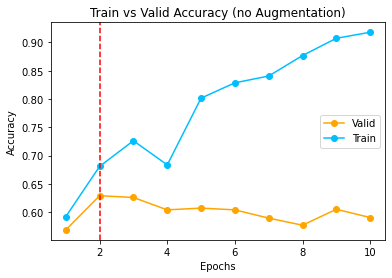

In [35]:
plt.title("Train vs Valid Accuracy (no Augmentation)")
plt.plot(epoch, test_accu_orignal_m1, marker='o', color='orange', label='Valid')
plt.plot(epoch, train_accu_orignal_m1, marker='o', color='deepskyblue', label='Train')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.axvline(x=test_accu_orignal_m1.index(max(test_accu_orignal_m1))+1, color='r', linestyle='--')
plt.show()

In [36]:
print(f'Train accuracy iteration: {train_accu_orignal_m1}')
print(f'Test accuracy iteration: {test_accu_orignal_m1}')

Train accuracy iteration: [0.5921875, 0.6809895833333334, 0.7263020833333333, 0.68359375, 0.8015625, 0.8286458333333333, 0.840625, 0.8768229166666667, 0.9072916666666667, 0.91796875]
Test accuracy iteration: [0.56875, 0.6291666666666667, 0.6260416666666667, 0.6041666666666666, 0.6072916666666667, 0.6041666666666666, 0.5895833333333333, 0.5770833333333333, 0.6052083333333333, 0.590625]


# Model 2

In [7]:
import torch.nn.functional as F 
import torch.optim as optim

class Net2(nn.Module):
    def __init__(self):
        
      super().__init__()
      self.conv1 = nn.Conv2d(3, 16, kernel_size= 3)
      self.pool1 = nn.MaxPool2d(2, 2)
      self.conv2 = nn.Conv2d(16, 32, kernel_size = 3)
      self.conv3 = nn.Conv2d(32, 32, kernel_size = 3)
      self.pool3 = nn.MaxPool2d(3, 3)
      self.norm = nn.BatchNorm2d(32)
      self.dropout1 = nn.Dropout2d(0.2)
      self.dropout2 = nn.Dropout(0.25)
      self.fc1 = nn.Linear(32*41*41, 1024) 
      self.fc2 = nn.Linear(1024, 2)

    def forward(self, x):
      x = self.pool1(F.relu(self.conv1(x)))
      x = F.relu(self.conv2(x))
      x = self.norm(x)
      x = self.pool3(F.relu(self.conv3(x)))
      x = self.dropout1(x)
      x = x.view(-1, 32*41*41)
      x = F.relu(self.fc1(x))
      x = self.dropout2(x)
      x = self.fc2(x)
      return x

## Flip

In [8]:
# set seed
torch.manual_seed(2)
torch.backends.cudnn.benchmark = False
torch.backends.cudnn.deterministic = True
Net2_Flip = Net2()

# move the model to GPU for speed if available
if torch.cuda.is_available():
  Net2_Flip.to('cuda')

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(Net2_Flip.parameters(), lr=0.01, momentum=0.8, weight_decay = 0.012)

0 10 1.2311865746974946
0 20 0.7872552394866943
0 30 0.7925063788890838
0 40 0.716203385591507
0 50 0.694792377948761
0 60 0.6976908206939697
0 70 0.704326844215393
0 80 0.6921024978160858
0 90 0.7027898550033569
0 100 0.682108473777771
0 110 0.7319754064083099
0 120 0.7008125901222229
0 130 0.6958477377891541
0 140 0.6920660018920899
0 150 0.7065208792686463
0 160 0.6834106087684632
0 170 0.7123880684375763
0 180 0.6966513514518737
0 190 0.7081942200660706
0 200 0.692756187915802
0 210 0.6951381683349609
0 220 0.696843808889389
0 230 0.693855220079422
0 240 0.7001131296157836
0 250 0.6936371386051178
0 260 0.6897392272949219
0 270 0.6911004066467286
0 280 0.6837371408939361
0 290 0.6980550289154053
0 300 0.6927882134914398
0 310 0.6874786376953125
0 320 0.7088542401790618
0 330 0.6864150166511536
0 340 0.6976168692111969
0 350 0.6858081996440888
0 360 0.7117295920848846
0 370 0.6919078350067138
0 380 0.7031685292720795
0 390 0.6927790343761444
0 400 0.6890350937843323
0 410 0.69143910

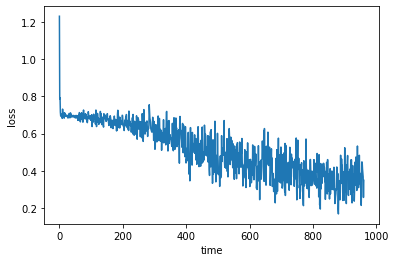

In [9]:
running_loss = 0 
printfreq = 10
l = []
t = []
k = 0
test_accu = []
train_accu = []

for epoch in range(10):
    for i, data in enumerate(Flip_Train_Loader):
        inputs, labels = data
        inputs = inputs.to('cuda')
        labels = labels.to('cuda')
        optimizer.zero_grad()
        outputs = Net2_Flip(inputs)  # forward pass 
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        if i % printfreq == printfreq-1:  
            print(epoch, i+1, running_loss / printfreq)
            k = k + 1
            l.append(running_loss / printfreq)
            t.append(k)
            running_loss = 0 

    total_test = 0  # keeps track of how many images we have processed 
    correct_test = 0  # keeps track of how many correct images our net predicts
    fname = './Model_all/seed1/Net2_Flip' + str(epoch) + '.pth'
    torch.save(Net2_Flip.state_dict(), fname)
    loaded_dict = torch.load(fname)
    Net2_Flip.load_state_dict(loaded_dict)
    with torch.no_grad():
      for i, data in enumerate(Animal_test_loader): 
        images, labels = data
        images = images.to('cuda')
        labels = labels.to('cuda')
        outputs = Net2_Flip(images)
        _, predicted = torch.max(outputs.data, 1)
        total_test += labels.size()[0]
        correct_test += (predicted == labels).sum().item()
        
    test_accu.append(correct_test/total_test)

    total_train = 0  # keeps track of how many images we have processed 
    correct_train = 0  # keeps track of how many correct images our net predicts
    with torch.no_grad():
      for i, data in enumerate(Flip_Train_Loader): 
        images, labels = data
        images = images.to('cuda')
        labels = labels.to('cuda')
        outputs = Net2_Flip(images)
        _, predicted = torch.max(outputs.data, 1)
        total_train += labels.size()[0]
        correct_train += (predicted == labels).sum().item()
        
    train_accu.append(correct_train/total_train)
# plotting
l = np.array(l)
t = np.array(t)
plt.plot(t, l)
plt.xlabel("time")
plt.ylabel("loss")
plt.show()

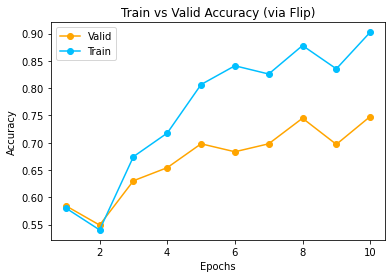

In [10]:
epoch = range(1, len(test_accu) + 1)
test_accu_flip_m2 = test_accu
train_accu_flip_m2 = train_accu
plt.title("Train vs Valid Accuracy (via Flip)")
plt.plot(epoch, test_accu_flip_m2, marker='o', color='orange', label='Valid')
plt.plot(epoch, train_accu_flip_m2, marker='o', color='deepskyblue', label='Train')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

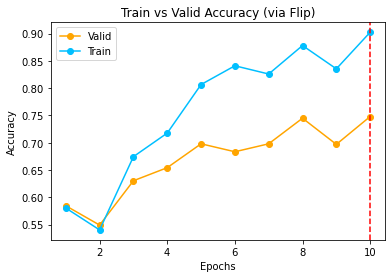

In [11]:
plt.title("Train vs Valid Accuracy (via Flip)")
plt.plot(epoch, test_accu_flip_m2, marker='o', color='orange', label='Valid')
plt.plot(epoch, train_accu_flip_m2, marker='o', color='deepskyblue', label='Train')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.axvline(x=test_accu_flip_m2.index(max(test_accu_flip_m2))+1, color='r', linestyle='--')
plt.show()

In [12]:
print(f'Train accuracy iteration: {train_accu_flip_m2}')
print(f'Test accuracy iteration: {test_accu_flip_m2}')

Train accuracy iteration: [0.5802083333333333, 0.5401041666666667, 0.6743489583333333, 0.717578125, 0.8065104166666667, 0.8408854166666667, 0.82578125, 0.8779947916666667, 0.8352864583333334, 0.90234375]
Test accuracy iteration: [0.584375, 0.5489583333333333, 0.6302083333333334, 0.6541666666666667, 0.6979166666666666, 0.6833333333333333, 0.6979166666666666, 0.7447916666666666, 0.696875, 0.7479166666666667]


### Our Best Model

In [13]:
model_scripted = torch.jit.script(Net2_Flip)
model_scripted.save('./Model_all/seed2/Net2_Flip_jit.pt')

## Rotate

In [43]:
# set seed
torch.manual_seed(2)
torch.backends.cudnn.benchmark = False
torch.backends.cudnn.deterministic = True
Net2_Rotate = Net2()

# move the model to GPU for speed if available
if torch.cuda.is_available():
  Net2_Rotate.to('cuda')

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(Net2_Rotate.parameters(), lr=0.01, momentum=0.8)

0 10 1.0280732691287995
0 20 0.763699209690094
0 30 0.7440502762794494
0 40 0.762782770395279
0 50 0.7107365071773529
0 60 0.7103302240371704
0 70 0.7031435489654541
0 80 0.6904257595539093
0 90 0.7048263669013977
0 100 0.700571209192276
0 110 0.6953356206417084
0 120 0.6953543603420258
0 130 0.6964598715305328
0 140 0.7004835188388825
0 150 0.6938293278217316
0 160 0.6993719935417175
0 170 0.7069484710693359
0 180 0.689620977640152
0 190 0.6894990503787994
0 200 0.7103800058364869
0 210 0.6936515927314758
0 220 0.6993080198764801
0 230 0.690958034992218
0 240 0.7121619522571564
0 250 0.6970587372779846
0 260 0.6925807237625122
0 270 0.6940912306308746
0 280 0.6893210172653198
0 290 0.6950353264808655
0 300 0.6941912531852722
0 310 0.6837854504585266
0 320 0.7094198286533355
0 330 0.678297346830368
0 340 0.6965900480747222
0 350 0.6893235266208648
0 360 0.7251401901245117
0 370 0.7031259000301361
0 380 0.6988613605499268
0 390 0.6980993211269378
0 400 0.6933196067810059
0 410 0.6910180

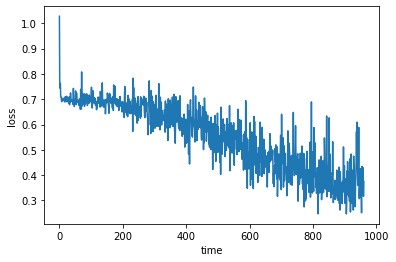

In [44]:
running_loss = 0 
printfreq = 10
l = []
t = []
k = 0
test_accu = []
train_accu = []

for epoch in range(10):
    for i, data in enumerate(Rotate_Train_Loader):
        inputs, labels = data
        inputs = inputs.to('cuda')
        labels = labels.to('cuda')
        optimizer.zero_grad()
        outputs = Net2_Rotate(inputs)  # forward pass 
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        if i % printfreq == printfreq-1:  
            print(epoch, i+1, running_loss / printfreq)
            k = k + 1
            l.append(running_loss / printfreq)
            t.append(k)
            running_loss = 0 

    total_test = 0  # keeps track of how many images we have processed 
    correct_test = 0  # keeps track of how many correct images our net predicts
    fname = './Model_all/seed2/Net2_Rotate' + str(epoch) + '.pth'
    torch.save(Net2_Rotate.state_dict(), fname)
    loaded_dict = torch.load(fname)
    Net2_Rotate.load_state_dict(loaded_dict)
    with torch.no_grad():
      for i, data in enumerate(Animal_test_loader): 
        images, labels = data
        images = images.to('cuda')
        labels = labels.to('cuda')
        outputs = Net2_Rotate(images)
        _, predicted = torch.max(outputs.data, 1)
        total_test += labels.size()[0]
        correct_test += (predicted == labels).sum().item()
        
    test_accu.append(correct_test/total_test)

    total_train = 0  # keeps track of how many images we have processed 
    correct_train = 0  # keeps track of how many correct images our net predicts
    with torch.no_grad():
      for i, data in enumerate(Rotate_Train_Loader): 
        images, labels = data
        images = images.to('cuda')
        labels = labels.to('cuda')
        outputs = Net2_Rotate(images)
        _, predicted = torch.max(outputs.data, 1)
        total_train += labels.size()[0]
        correct_train += (predicted == labels).sum().item()
        
    train_accu.append(correct_train/total_train)
# plotting
l = np.array(l)
t = np.array(t)
plt.plot(t, l)
plt.xlabel("time")
plt.ylabel("loss")
plt.show()

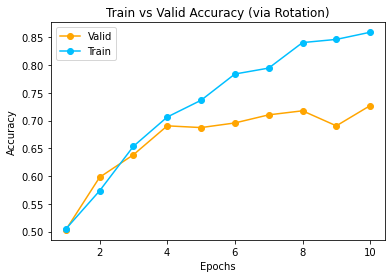

In [45]:
epoch = range(1, len(test_accu) + 1)
test_accu_rotate_m2 = test_accu
train_accu_rotate_m2 = train_accu
plt.title("Train vs Valid Accuracy (via Rotation)")
plt.plot(epoch, test_accu_rotate_m2, marker='o', color='orange', label='Valid')
plt.plot(epoch, train_accu_rotate_m2, marker='o', color='deepskyblue', label='Train')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

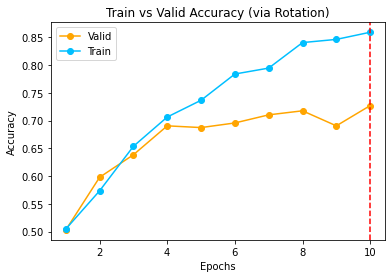

In [46]:
plt.title("Train vs Valid Accuracy (via Rotation)")
plt.plot(epoch, test_accu_rotate_m2, marker='o', color='orange', label='Valid')
plt.plot(epoch, train_accu_rotate_m2, marker='o', color='deepskyblue', label='Train')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.axvline(x=test_accu_rotate_m2.index(max(test_accu_rotate_m2))+1, color='r', linestyle='--')
plt.show()

In [47]:
print(f'Train accuracy iteration: {train_accu_rotate_m2}')
print(f'Test accuracy iteration: {test_accu_rotate_m2}')

Train accuracy iteration: [0.5046875, 0.5735677083333334, 0.6537760416666667, 0.7065104166666667, 0.73671875, 0.783984375, 0.7946614583333333, 0.840625, 0.8463541666666666, 0.8592447916666667]
Test accuracy iteration: [0.503125, 0.5979166666666667, 0.6385416666666667, 0.690625, 0.6875, 0.6958333333333333, 0.7104166666666667, 0.7177083333333333, 0.690625, 0.7270833333333333]


## Crop

In [48]:
# set seed
torch.manual_seed(2)
torch.backends.cudnn.benchmark = False
torch.backends.cudnn.deterministic = True
Net2_Crop = Net2()

# move the model to GPU for speed if available
if torch.cuda.is_available():
  Net2_Crop.to('cuda')

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(Net2_Crop.parameters(), lr=0.01, momentum=0.8)

0 10 1.6199008882045747
0 20 0.8615505248308182
0 30 0.8267024755477905
0 40 0.7452025532722473
0 50 0.7021042823791503
0 60 0.6970770299434662
0 70 0.7038958191871643
0 80 0.6862000524997711
0 90 0.6829741537570954
0 100 0.7125734627246857
0 110 0.70885249376297
0 120 0.6945081055164337
0 130 0.6950201690196991
0 140 0.7058469891548157
0 150 0.7018201231956482
0 160 0.6829571843147277
0 170 0.7074003934860229
0 180 0.7007274866104126
0 190 0.6976930499076843
0 200 0.6914714336395263
0 210 0.6942370355129241
0 220 0.6936949074268342
0 230 0.696690458059311
0 240 0.6994819462299346
0 250 0.693260395526886
0 260 0.6935109078884125
0 270 0.6944080293178558
0 280 0.686646169424057
0 290 0.7011064529418946
0 300 0.699419367313385
0 310 0.6928517043590545
0 320 0.6973862648010254
0 330 0.6910363852977752
0 340 0.698425680398941
0 350 0.6979864716529847
0 360 0.6997315406799316
0 370 0.6893113732337952
0 380 0.6992376148700714
0 390 0.6933362305164337
0 400 0.6937747955322265
0 410 0.69430338

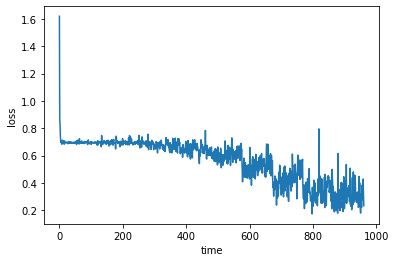

In [49]:
running_loss = 0 
printfreq = 10
l = []
t = []
k = 0
test_accu = []
train_accu = []

for epoch in range(10):
    for i, data in enumerate(Crop_Train_Loader):
        inputs, labels = data
        inputs = inputs.to('cuda')
        labels = labels.to('cuda')
        optimizer.zero_grad()
        outputs = Net2_Crop(inputs)  # forward pass 
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        if i % printfreq == printfreq-1:  
            print(epoch, i+1, running_loss / printfreq)
            k = k + 1
            l.append(running_loss / printfreq)
            t.append(k)
            running_loss = 0 

    total_test = 0  # keeps track of how many images we have processed 
    correct_test = 0  # keeps track of how many correct images our net predicts
    fname = './Model_all/seed2/Net2_Crop' + str(epoch) + '.pth'
    torch.save(Net2_Crop.state_dict(), fname)
    loaded_dict = torch.load(fname)
    Net2_Crop.load_state_dict(loaded_dict)
    with torch.no_grad():
      for i, data in enumerate(Animal_test_loader): 
        images, labels = data
        images = images.to('cuda')
        labels = labels.to('cuda')
        outputs = Net2_Crop(images)
        _, predicted = torch.max(outputs.data, 1)
        total_test += labels.size()[0]
        correct_test += (predicted == labels).sum().item()
        
    test_accu.append(correct_test/total_test)

    total_train = 0  # keeps track of how many images we have processed 
    correct_train = 0  # keeps track of how many correct images our net predicts
    with torch.no_grad():
      for i, data in enumerate(Crop_Train_Loader): 
        images, labels = data
        images = images.to('cuda')
        labels = labels.to('cuda')
        outputs = Net2_Crop(images)
        _, predicted = torch.max(outputs.data, 1)
        total_train += labels.size()[0]
        correct_train += (predicted == labels).sum().item()
        
    train_accu.append(correct_train/total_train)
# plotting
l = np.array(l)
t = np.array(t)
plt.plot(t, l)
plt.xlabel("time")
plt.ylabel("loss")
plt.show()

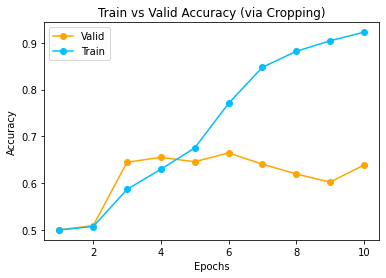

In [50]:
epoch = range(1, len(test_accu) + 1)
test_accu_crop_m2 = test_accu
train_accu_crop_m2= train_accu
plt.title("Train vs Valid Accuracy (via Cropping)")
plt.plot(epoch, test_accu_crop_m2, marker='o', color='orange', label='Valid')
plt.plot(epoch, train_accu_crop_m2, marker='o', color='deepskyblue', label='Train')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

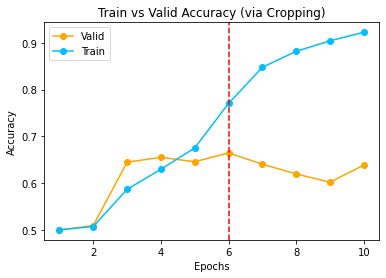

In [51]:
plt.title("Train vs Valid Accuracy (via Cropping)")
plt.plot(epoch, test_accu_crop_m2, marker='o', color='orange', label='Valid')
plt.plot(epoch, train_accu_crop_m2, marker='o', color='deepskyblue', label='Train')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.axvline(x=test_accu_crop_m2.index(max(test_accu_crop_m2))+1, color='r', linestyle='--')
plt.show()

In [52]:
print(f'Train accuracy iteration: {train_accu_crop_m2}')
print(f'Test accuracy iteration: {test_accu_crop_m2}')

Train accuracy iteration: [0.5, 0.5072916666666667, 0.58671875, 0.6296875, 0.6752604166666667, 0.7704427083333333, 0.8477864583333333, 0.8819010416666667, 0.9044270833333333, 0.9227864583333333]
Test accuracy iteration: [0.5, 0.509375, 0.6447916666666667, 0.6552083333333333, 0.6458333333333334, 0.6645833333333333, 0.640625, 0.6197916666666666, 0.6020833333333333, 0.6385416666666667]


## Color

In [8]:
# set seed
torch.manual_seed(2)
torch.backends.cudnn.benchmark = False
torch.backends.cudnn.deterministic = True
Net2_Color = Net2()

# move the model to GPU for speed if available
if torch.cuda.is_available():
  Net2_Color.to('cuda')

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(Net2_Color.parameters(), lr=0.01, momentum=0.8, weight_decay = 0.017)

0 10 1.012855303287506
0 20 0.7920693337917328
0 30 0.7468135297298432
0 40 0.7282381415367126
0 50 0.7068893790245057
0 60 0.7105689108371734
0 70 0.703465360403061
0 80 0.7232199132442474
0 90 0.692742258310318
0 100 0.7069712936878204
0 110 0.6893348336219788
0 120 0.6950622379779816
0 130 0.6951443612575531
0 140 0.6972385048866272
0 150 0.7024696171283722
0 160 0.6851331293582916
0 170 0.7085410177707672
0 180 0.7132743954658508
0 190 0.694859504699707
0 200 0.6923025965690612
0 210 0.6964195907115937
0 220 0.7020325601100922
0 230 0.6921725630760193
0 240 0.6975634932518006
0 250 0.6917979061603546
0 260 0.6919461548328399
0 270 0.6963581681251526
0 280 0.6768303096294404
0 290 0.7044132888317108
0 300 0.6936211049556732
0 310 0.6882562756538391
0 320 0.6990950226783752
0 330 0.691316670179367
0 340 0.6925403058528901
0 350 0.6914706230163574
0 360 0.7048160433769226
0 370 0.6933537721633911
0 380 0.6960655331611634
0 390 0.6974194765090942
0 400 0.6865989089012146
0 410 0.692446

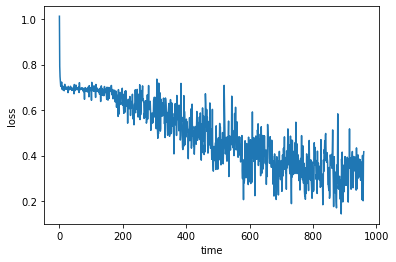

In [9]:
running_loss = 0 
printfreq = 10
l = []
t = []
k = 0
test_accu = []
train_accu = []

for epoch in range(10):
    for i, data in enumerate(Color_Train_Loader):
        inputs, labels = data
        inputs = inputs.to('cuda')
        labels = labels.to('cuda')
        optimizer.zero_grad()
        outputs = Net2_Color(inputs)  # forward pass 
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        if i % printfreq == printfreq-1:  
            print(epoch, i+1, running_loss / printfreq)
            k = k + 1
            l.append(running_loss / printfreq)
            t.append(k)
            running_loss = 0 

    total_test = 0  # keeps track of how many images we have processed 
    correct_test = 0  # keeps track of how many correct images our net predicts
    fname = './Model_all/seed2/Net2_Color' + str(epoch) + '.pth'
    torch.save(Net2_Color.state_dict(), fname)
    loaded_dict = torch.load(fname)
    Net2_Color.load_state_dict(loaded_dict)
    with torch.no_grad():
      for i, data in enumerate(Animal_test_loader): 
        images, labels = data
        images = images.to('cuda')
        labels = labels.to('cuda')
        outputs = Net2_Color(images)
        _, predicted = torch.max(outputs.data, 1)
        total_test += labels.size()[0]
        correct_test += (predicted == labels).sum().item()
        
    test_accu.append(correct_test/total_test)

    total_train = 0  # keeps track of how many images we have processed 
    correct_train = 0  # keeps track of how many correct images our net predicts
    with torch.no_grad():
      for i, data in enumerate(Color_Train_Loader): 
        images, labels = data
        images = images.to('cuda')
        labels = labels.to('cuda')
        outputs = Net2_Color(images)
        _, predicted = torch.max(outputs.data, 1)
        total_train += labels.size()[0]
        correct_train += (predicted == labels).sum().item()
        
    train_accu.append(correct_train/total_train)
# plotting
l = np.array(l)
t = np.array(t)
plt.plot(t, l)
plt.xlabel("time")
plt.ylabel("loss")
plt.show()

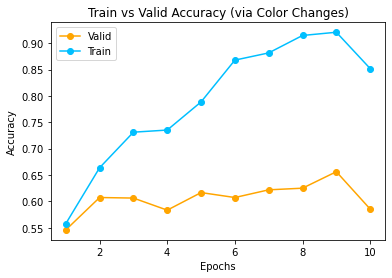

In [10]:
epoch = range(1, len(test_accu) + 1)
test_accu_color_m2 = test_accu
train_accu_color_m2 = train_accu
plt.title("Train vs Valid Accuracy (via Color Changes)")
plt.plot(epoch, test_accu_color_m2, marker='o', color='orange', label='Valid')
plt.plot(epoch, train_accu_color_m2, marker='o', color='deepskyblue', label='Train')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

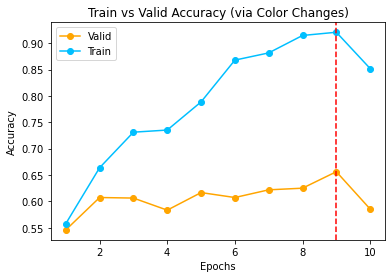

In [11]:
plt.title("Train vs Valid Accuracy (via Color Changes)")
plt.plot(epoch, test_accu_color_m2, marker='o', color='orange', label='Valid')
plt.plot(epoch, train_accu_color_m2, marker='o', color='deepskyblue', label='Train')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.axvline(x=test_accu_color_m2.index(max(test_accu_color_m2))+1, color='r', linestyle='--')
plt.show()

In [12]:
print(f'Train accuracy iteration: {train_accu_color_m2}')
print(f'Test accuracy iteration: {test_accu_color_m2}')

Train accuracy iteration: [0.5576822916666667, 0.6638020833333333, 0.73125, 0.7352864583333333, 0.788671875, 0.86796875, 0.881640625, 0.9147135416666666, 0.9208333333333333, 0.851953125]
Test accuracy iteration: [0.5458333333333333, 0.6072916666666667, 0.60625, 0.5833333333333334, 0.6166666666666667, 0.6072916666666667, 0.621875, 0.625, 0.65625, 0.5854166666666667]


## Blur

In [8]:
# set seed
torch.manual_seed(2)
torch.backends.cudnn.benchmark = False
torch.backends.cudnn.deterministic = True
Net2_Blur = Net2()

# move the model to GPU for speed if available
if torch.cuda.is_available():
  Net2_Blur.to('cuda')

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(Net2_Blur.parameters(), lr=0.01, momentum=0.8, weight_decay = 0.011)

0 10 1.0380327254533768
0 20 0.7915789306163787
0 30 0.757658189535141
0 40 0.7258996784687042
0 50 0.7426957488059998
0 60 0.7236317574977875
0 70 0.7055509805679321
0 80 0.7039531469345093
0 90 0.6915269315242767
0 100 0.6957787930965423
0 110 0.7029116153717041
0 120 0.6998104870319366
0 130 0.6992032110691071
0 140 0.6829795062541961
0 150 0.705156022310257
0 160 0.6875271499156952
0 170 0.7160518527030945
0 180 0.7012657940387725
0 190 0.6954860925674439
0 200 0.697658371925354
0 210 0.698944216966629
0 220 0.7012295007705689
0 230 0.6940233707427979
0 240 0.6968457400798798
0 250 0.6911900103092193
0 260 0.6803146302700043
0 270 0.6978765368461609
0 280 0.6817992627620697
0 290 0.6970825612545013
0 300 0.695542848110199
0 310 0.6778217077255249
0 320 0.7133194625377655
0 330 0.6864486396312713
0 340 0.6918502151966095
0 350 0.686555701494217
0 360 0.7258310914039612
0 370 0.6808425724506378
0 380 0.7158316969871521
0 390 0.6880608677864075
0 400 0.6985802531242371
0 410 0.6888532

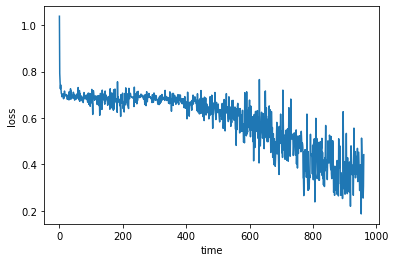

In [9]:
running_loss = 0 
printfreq = 10
l = []
t = []
k = 0
test_accu = []
train_accu = []

for epoch in range(10):
    for i, data in enumerate(Blur_Train_Loader):
        inputs, labels = data
        inputs = inputs.to('cuda')
        labels = labels.to('cuda')
        optimizer.zero_grad()
        outputs = Net2_Blur(inputs)  # forward pass 
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        if i % printfreq == printfreq-1:  
            print(epoch, i+1, running_loss / printfreq)
            k = k + 1
            l.append(running_loss / printfreq)
            t.append(k)
            running_loss = 0 

    total_test = 0  # keeps track of how many images we have processed 
    correct_test = 0  # keeps track of how many correct images our net predicts
    fname = './Model_all/seed2/Net2_Blur' + str(epoch) + '.pth'
    torch.save(Net2_Blur.state_dict(), fname)
    loaded_dict = torch.load(fname)
    Net2_Blur.load_state_dict(loaded_dict)
    with torch.no_grad():
      for i, data in enumerate(Animal_test_loader): 
        images, labels = data
        images = images.to('cuda')
        labels = labels.to('cuda')
        outputs = Net2_Blur(images)
        _, predicted = torch.max(outputs.data, 1)
        total_test += labels.size()[0]
        correct_test += (predicted == labels).sum().item()
        
    test_accu.append(correct_test/total_test)

    total_train = 0  # keeps track of how many images we have processed 
    correct_train = 0  # keeps track of how many correct images our net predicts
    with torch.no_grad():
      for i, data in enumerate(Blur_Train_Loader): 
        images, labels = data
        images = images.to('cuda')
        labels = labels.to('cuda')
        outputs = Net2_Blur(images)
        _, predicted = torch.max(outputs.data, 1)
        total_train += labels.size()[0]
        correct_train += (predicted == labels).sum().item()
        
    train_accu.append(correct_train/total_train)
# plotting
l = np.array(l)
t = np.array(t)
plt.plot(t, l)
plt.xlabel("time")
plt.ylabel("loss")
plt.show()

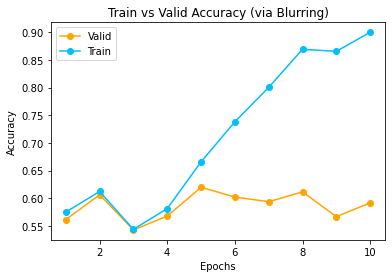

In [10]:
epoch = range(1, len(test_accu) + 1)
test_accu_blur_m2 = test_accu
train_accu_blur_m2 = train_accu
plt.title("Train vs Valid Accuracy (via Blurring)")
plt.plot(epoch, test_accu_blur_m2, marker='o', color='orange', label='Valid')
plt.plot(epoch, train_accu_blur_m2, marker='o', color='deepskyblue', label='Train')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

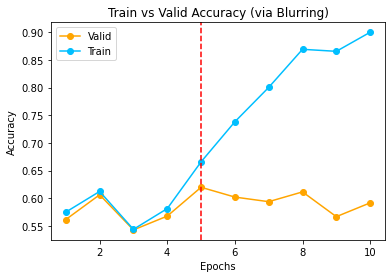

In [11]:
plt.title("Train vs Valid Accuracy (via Blurring)")
plt.plot(epoch, test_accu_blur_m2, marker='o', color='orange', label='Valid')
plt.plot(epoch, train_accu_blur_m2, marker='o', color='deepskyblue', label='Train')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.axvline(x=test_accu_blur_m2.index(max(test_accu_blur_m2))+1, color='r', linestyle='--')
plt.show()

In [12]:
print(f'Train accuracy iteration: {train_accu_blur_m2}')
print(f'Test accuracy iteration: {test_accu_blur_m2}')

Train accuracy iteration: [0.5748697916666666, 0.6122395833333333, 0.54375, 0.58125, 0.6657552083333333, 0.73828125, 0.800390625, 0.8692708333333333, 0.865625, 0.9001302083333333]
Test accuracy iteration: [0.5614583333333333, 0.60625, 0.5427083333333333, 0.5677083333333334, 0.6197916666666666, 0.6020833333333333, 0.59375, 0.6114583333333333, 0.5666666666666667, 0.5916666666666667]


## Orignal

In [13]:
# set seed
torch.manual_seed(2)
torch.backends.cudnn.benchmark = False
torch.backends.cudnn.deterministic = True
Net2_Orignal = Net2()

# move the model to GPU for speed if available
if torch.cuda.is_available():
  Net2_Orignal.to('cuda')

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(Net2_Orignal.parameters(), lr=0.01, momentum=0.8, weight_decay = 0.008)

0 10 1.0214001178741454
0 20 0.7644605934619904
0 30 0.7067213892936707
0 40 0.6855587184429168
0 50 0.7323180258274078
0 60 0.7030968010425568
0 70 0.6943382143974304
0 80 0.6948741972446442
0 90 0.6919139862060547
0 100 0.6924751937389374
0 110 0.6977597236633301
0 120 0.691161572933197
0 130 0.667271637916565
0 140 0.7098912715911865
0 150 0.7004042863845825
0 160 0.6954189300537109
0 170 0.6915363848209382
0 180 0.6962133586406708
0 190 0.6969754457473755
0 200 0.694646567106247
0 210 0.6974658191204071
0 220 0.6931666910648346
0 230 0.6876680016517639
0 240 0.6896755516529083
0 250 0.6870086431503296
0 260 0.6859837949275971
0 270 0.7053314745426178
0 280 0.6978323876857757
0 290 0.7057050466537476
0 300 0.6920136332511901
0 310 0.690956848859787
0 320 0.6975858569145202
0 330 0.686343652009964
0 340 0.6680056035518647
0 350 0.7468582987785339
0 360 0.6900304794311524
0 370 0.6555582165718079
0 380 0.7033584833145141
0 390 0.7239569783210754
0 400 0.692627340555191
0 410 0.7149706

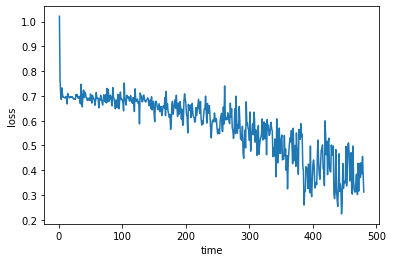

In [14]:
running_loss = 0 
printfreq = 10
l = []
t = []
k = 0
test_accu = []
train_accu = []

for epoch in range(10):
    for i, data in enumerate(Orignal_Train_Loader):
        inputs, labels = data
        inputs = inputs.to('cuda')
        labels = labels.to('cuda')
        optimizer.zero_grad()
        outputs = Net2_Orignal(inputs)  # forward pass 
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        if i % printfreq == printfreq-1:  
            print(epoch, i+1, running_loss / printfreq)
            k = k + 1
            l.append(running_loss / printfreq)
            t.append(k)
            running_loss = 0 

    total_test = 0  # keeps track of how many images we have processed 
    correct_test = 0  # keeps track of how many correct images our net predicts
    fname = './Model_all/seed2/Net2_Orignal' + str(epoch) + '.pth'
    torch.save(Net2_Orignal.state_dict(), fname)
    loaded_dict = torch.load(fname)
    Net2_Orignal.load_state_dict(loaded_dict)
    with torch.no_grad():
      for i, data in enumerate(Animal_test_loader): 
        images, labels = data
        images = images.to('cuda')
        labels = labels.to('cuda')
        outputs = Net2_Orignal(images)
        _, predicted = torch.max(outputs.data, 1)
        total_test += labels.size()[0]
        correct_test += (predicted == labels).sum().item()
        
    test_accu.append(correct_test/total_test)

    total_train = 0  # keeps track of how many images we have processed 
    correct_train = 0  # keeps track of how many correct images our net predicts
    with torch.no_grad():
      for i, data in enumerate(Orignal_Train_Loader): 
        images, labels = data
        images = images.to('cuda')
        labels = labels.to('cuda')
        outputs = Net2_Orignal(images)
        _, predicted = torch.max(outputs.data, 1)
        total_train += labels.size()[0]
        correct_train += (predicted == labels).sum().item()
        
    train_accu.append(correct_train/total_train)
# plotting
l = np.array(l)
t = np.array(t)
plt.plot(t, l)
plt.xlabel("time")
plt.ylabel("loss")
plt.show()

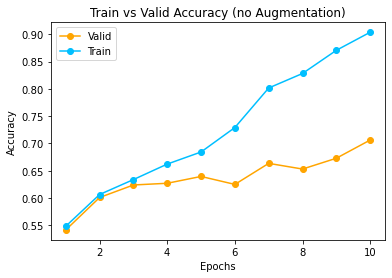

In [15]:
epoch = range(1, len(test_accu) + 1)
test_accu_orignal_m2 = test_accu
train_accu_orignal_m2 = train_accu
plt.title("Train vs Valid Accuracy (no Augmentation)")
plt.plot(epoch, test_accu_orignal_m2, marker='o', color='orange', label='Valid')
plt.plot(epoch, train_accu_orignal_m2, marker='o', color='deepskyblue', label='Train')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

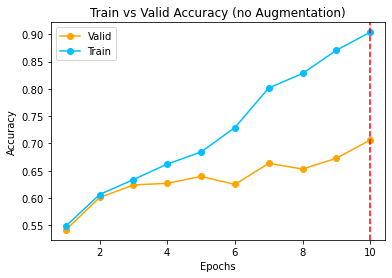

In [16]:
plt.title("Train vs Valid Accuracy (no Augmentation)")
plt.plot(epoch, test_accu_orignal_m2, marker='o', color='orange', label='Valid')
plt.plot(epoch, train_accu_orignal_m2, marker='o', color='deepskyblue', label='Train')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.axvline(x=test_accu_orignal_m2.index(max(test_accu_orignal_m2))+1, color='r', linestyle='--')
plt.show()

In [17]:
print(f'Train accuracy iteration: {train_accu_orignal_m2}')
print(f'Test accuracy iteration: {test_accu_orignal_m2}')

Train accuracy iteration: [0.5484375, 0.6065104166666667, 0.6338541666666667, 0.6622395833333333, 0.684375, 0.7291666666666666, 0.8015625, 0.828125, 0.8705729166666667, 0.9036458333333334]
Test accuracy iteration: [0.5416666666666666, 0.6010416666666667, 0.6239583333333333, 0.6270833333333333, 0.6395833333333333, 0.625, 0.6635416666666667, 0.653125, 0.6729166666666667, 0.70625]


# Model 3

In [7]:
import torch.nn.functional as F 
import torch.optim as optim
from typing import Callable, Any, Optional, Tuple, List
from torch import nn, Tensor

class Net3(nn.Module):
    def __init__(self):
        
      super().__init__()
      self.conv1a = BasicConv2d(3, 32, kernel_size = 3, stride = 2)
      self.conv2a = BasicConv2d(32, 32, kernel_size = 3)
      self.conv2b = BasicConv2d(32, 64, kernel_size = 3, padding = 1)
      self.pool3 = nn.MaxPool2d(kernel_size = 3, stride = 2)
      self.mixed4 = InceptionA(64, pool_features = 32)
      self.dropout1 = nn.Dropout2d(0.5)
      self.dropout2 = nn.Dropout(0.5)
      self.fc1 = nn.Linear(62*62*144, 1024) 
      self.fc2 = nn.Linear(1024, 2)

    def forward(self, x):
      # 256 x 256 x 3
      x = self.conv1a(x)
      # 127 x 127 x 32
      x = self.conv2a(x)
      # 125 x 125 x 32
      x = self.conv2b(x)
      # 125 x 125 x 64
      x = self.pool3(x)
      # 62 x 62 x 64
      x = self.mixed4(x)
      # 62 x 62 x 144
      x = self.dropout1(x)
      x = x.view(-1, 62*62*144)
      # 144
      x = F.relu(self.fc1(x))
      x = self.dropout2(x)
      x = self.fc2(x)
      return x

class InceptionA(nn.Module):
    def __init__(
        self, in_channels: int, pool_features: int, conv_block: Optional[Callable[..., nn.Module]] = None
    ) -> None:
        super().__init__()
        if conv_block is None:
            conv_block = BasicConv2d
        self.branch1x1 = conv_block(in_channels, 32, kernel_size=1)

        self.branch5x5_1 = conv_block(in_channels, 24, kernel_size=1)
        self.branch5x5_2 = conv_block(24, 32, kernel_size=5, padding=2)

        self.branch3x3dbl_1 = conv_block(in_channels, 32, kernel_size=1)
        self.branch3x3dbl_2 = conv_block(32, 48, kernel_size=3, padding=1)
        self.branch3x3dbl_3 = conv_block(48, 48, kernel_size=3, padding=1)

        self.branch_pool = conv_block(in_channels, pool_features, kernel_size=1)

    def _forward(self, x: Tensor) -> List[Tensor]:
        branch1x1 = self.branch1x1(x)

        branch5x5 = self.branch5x5_1(x)
        branch5x5 = self.branch5x5_2(branch5x5)

        branch3x3dbl = self.branch3x3dbl_1(x)
        branch3x3dbl = self.branch3x3dbl_2(branch3x3dbl)
        branch3x3dbl = self.branch3x3dbl_3(branch3x3dbl)

        branch_pool = F.avg_pool2d(x, kernel_size=3, stride=1, padding=1)
        branch_pool = self.branch_pool(branch_pool)

        outputs = [branch1x1, branch5x5, branch3x3dbl, branch_pool]
        return outputs

    def forward(self, x: Tensor) -> Tensor:
        outputs = self._forward(x)
        return torch.cat(outputs, 1)

class BasicConv2d(nn.Module):
    def __init__(self, in_channels: int, out_channels: int, **kwargs: Any) -> None:
        super().__init__()
        self.conv = nn.Conv2d(in_channels, out_channels, bias=False, **kwargs)
        self.bn = nn.BatchNorm2d(out_channels, eps=0.001)

    def forward(self, x: Tensor) -> Tensor:
        x = self.conv(x)
        x = self.bn(x)
        return F.relu(x, inplace=True)

## Flip

In [7]:
# set seed
torch.manual_seed(2)
torch.backends.cudnn.benchmark = False
torch.backends.cudnn.deterministic = True
Net3_Flip = Net3()

# move the model to GPU for speed if available
if torch.cuda.is_available():
  Net3_Flip.to('cuda')

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(Net3_Flip.parameters(), lr=0.001, momentum=0.8)

0 10 1.8235291719436646
0 20 1.8938095450401307
0 30 1.9738259494304657
0 40 0.9104817748069763
0 50 0.8804606616497039
0 60 0.7516656875610351
0 70 0.7465015590190888
0 80 0.8382918298244476
0 90 0.7552577078342437
0 100 0.7079013168811799
0 110 0.7420973598957061
0 120 0.6615184128284455
0 130 0.7304349303245544
0 140 0.7284152925014495
0 150 0.7462080180644989
0 160 0.6933102130889892
0 170 0.6678274512290955
0 180 0.6803653776645661
0 190 0.6572817206382752
0 200 0.7323959589004516
0 210 0.6767407804727554
0 220 0.6873000085353851
0 230 0.6670132279396057
0 240 0.6619571268558502
0 250 0.770292991399765
0 260 0.6678303480148315
0 270 0.6535634070634841
0 280 0.7128674983978271
0 290 0.7223840713500976
0 300 0.6449407517910004
0 310 0.6686037242412567
0 320 0.6834973514080047
0 330 0.706100556254387
0 340 0.6359525144100189
0 350 0.6510018795728684
0 360 0.7254834771156311
0 370 0.6640725135803223
0 380 0.7684642732143402
0 390 0.6819569766521454
0 400 0.6858094334602356
0 410 0.596

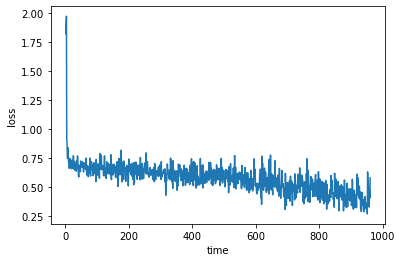

In [8]:
running_loss = 0 
printfreq = 10
l = []
t = []
k = 0
test_accu = []
train_accu = []

for epoch in range(10):
    for i, data in enumerate(Flip_Train_Loader):
        inputs, labels = data
        inputs = inputs.to('cuda')
        labels = labels.to('cuda')
        optimizer.zero_grad()
        outputs = Net3_Flip(inputs)  # forward pass 
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        if i % printfreq == printfreq-1:  
            print(epoch, i+1, running_loss / printfreq)
            k = k + 1
            l.append(running_loss / printfreq)
            t.append(k)
            running_loss = 0 

    total_test = 0  # keeps track of how many images we have processed 
    correct_test = 0  # keeps track of how many correct images our net predicts
    fname = './Model_all/seed2/Net3_Flip' + str(epoch) + '.pth'
    torch.save(Net3_Flip.state_dict(), fname)
    loaded_dict = torch.load(fname)
    Net3_Flip.load_state_dict(loaded_dict)
    with torch.no_grad():
      for i, data in enumerate(Animal_test_loader): 
        images, labels = data
        images = images.to('cuda')
        labels = labels.to('cuda')
        outputs = Net3_Flip(images)
        _, predicted = torch.max(outputs.data, 1)
        total_test += labels.size()[0]
        correct_test += (predicted == labels).sum().item()
        
    test_accu.append(correct_test/total_test)

    total_train = 0  # keeps track of how many images we have processed 
    correct_train = 0  # keeps track of how many correct images our net predicts
    with torch.no_grad():
      for i, data in enumerate(Flip_Train_Loader): 
        images, labels = data
        images = images.to('cuda')
        labels = labels.to('cuda')
        outputs = Net3_Flip(images)
        _, predicted = torch.max(outputs.data, 1)
        total_train += labels.size()[0]
        correct_train += (predicted == labels).sum().item()
        
    train_accu.append(correct_train/total_train)
# plotting
l = np.array(l)
t = np.array(t)
plt.plot(t, l)
plt.xlabel("time")
plt.ylabel("loss")
plt.show()

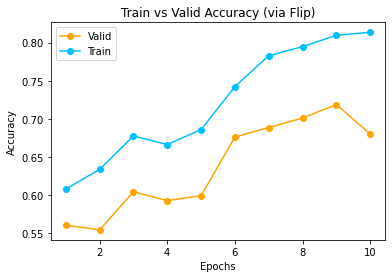

In [9]:
epoch = range(1, len(test_accu) + 1)
test_accu_flip_m3 = test_accu
train_accu_flip_m3 = train_accu
plt.title("Train vs Valid Accuracy (via Flip)")
plt.plot(epoch, test_accu_flip_m3, marker='o', color='orange', label='Valid')
plt.plot(epoch, train_accu_flip_m3, marker='o', color='deepskyblue', label='Train')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

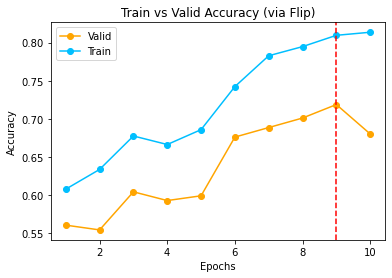

In [10]:
plt.title("Train vs Valid Accuracy (via Flip)")
plt.plot(epoch, test_accu_flip_m3, marker='o', color='orange', label='Valid')
plt.plot(epoch, train_accu_flip_m3, marker='o', color='deepskyblue', label='Train')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.axvline(x=test_accu_flip_m3.index(max(test_accu_flip_m3))+1, color='r', linestyle='--')
plt.show()

In [11]:
print(f'Train accuracy iteration: {train_accu_flip_m3}')
print(f'Test accuracy iteration: {test_accu_flip_m3}')

Train accuracy iteration: [0.6076822916666667, 0.63359375, 0.6774739583333333, 0.6662760416666667, 0.6858072916666667, 0.7423177083333333, 0.7828125, 0.7947916666666667, 0.8096354166666667, 0.813671875]
Test accuracy iteration: [0.5604166666666667, 0.5541666666666667, 0.6041666666666666, 0.5927083333333333, 0.5989583333333334, 0.6760416666666667, 0.6885416666666667, 0.7010416666666667, 0.71875, 0.6802083333333333]


## Rotate

In [7]:
# set seed
torch.manual_seed(2)
torch.backends.cudnn.benchmark = False
torch.backends.cudnn.deterministic = True
Net3_Rotate = Net3()

# move the model to GPU for speed if available
if torch.cuda.is_available():
  Net3_Rotate.to('cuda')

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(Net3_Rotate.parameters(), lr=0.001, momentum=0.8)

0 10 1.9314223110675812
0 20 2.2107256650924683
0 30 1.5177905976772308
0 40 1.044338881969452
0 50 1.3197433590888976
0 60 0.8715203106403351
0 70 0.7358011066913605
0 80 0.679530119895935
0 90 0.7920209407806397
0 100 0.701111114025116
0 110 0.7550704836845398
0 120 0.7089494109153748
0 130 0.7477387249469757
0 140 0.7889546573162078
0 150 0.7070555567741394
0 160 0.7060183942317962
0 170 0.6885880351066589
0 180 0.695241528749466
0 190 0.6770678281784057
0 200 0.7202117264270782
0 210 0.6824914813041687
0 220 0.7278260827064514
0 230 0.6370697259902954
0 240 0.7660043835639954
0 250 0.8023288547992706
0 260 0.6890702903270721
0 270 0.6831268668174744
0 280 0.7117834329605103
0 290 0.6796542584896088
0 300 0.6654882490634918
0 310 0.688133430480957
0 320 0.7291804373264312
0 330 0.7009422332048416
0 340 0.7571179568767548
0 350 0.6777771830558776
0 360 0.7160577356815339
0 370 0.6645865947008133
0 380 0.7773780107498169
0 390 0.6992041587829589
0 400 0.6917118668556214
0 410 0.621520

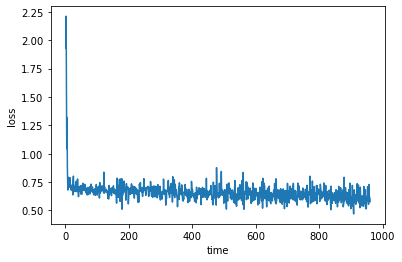

In [8]:
running_loss = 0 
printfreq = 10
l = []
t = []
k = 0
test_accu = []
train_accu = []

for epoch in range(10):
    for i, data in enumerate(Rotate_Train_Loader):
        inputs, labels = data
        inputs = inputs.to('cuda')
        labels = labels.to('cuda')
        optimizer.zero_grad()
        outputs = Net3_Rotate(inputs)  # forward pass 
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        if i % printfreq == printfreq-1:  
            print(epoch, i+1, running_loss / printfreq)
            k = k + 1
            l.append(running_loss / printfreq)
            t.append(k)
            running_loss = 0 

    total_test = 0  # keeps track of how many images we have processed 
    correct_test = 0  # keeps track of how many correct images our net predicts
    fname = './Model_all/seed2/Net3_Rotate' + str(epoch) + '.pth'
    torch.save(Net3_Rotate.state_dict(), fname)
    loaded_dict = torch.load(fname)
    Net3_Rotate.load_state_dict(loaded_dict)
    with torch.no_grad():
      for i, data in enumerate(Animal_test_loader): 
        images, labels = data
        images = images.to('cuda')
        labels = labels.to('cuda')
        outputs = Net3_Rotate(images)
        _, predicted = torch.max(outputs.data, 1)
        total_test += labels.size()[0]
        correct_test += (predicted == labels).sum().item()
        
    test_accu.append(correct_test/total_test)

    total_train = 0  # keeps track of how many images we have processed 
    correct_train = 0  # keeps track of how many correct images our net predicts
    with torch.no_grad():
      for i, data in enumerate(Rotate_Train_Loader): 
        images, labels = data
        images = images.to('cuda')
        labels = labels.to('cuda')
        outputs = Net3_Rotate(images)
        _, predicted = torch.max(outputs.data, 1)
        total_train += labels.size()[0]
        correct_train += (predicted == labels).sum().item()
        
    train_accu.append(correct_train/total_train)
# plotting
l = np.array(l)
t = np.array(t)
plt.plot(t, l)
plt.xlabel("time")
plt.ylabel("loss")
plt.show()

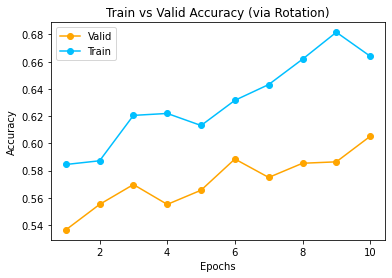

In [9]:
epoch = range(1, len(test_accu) + 1)
test_accu_rotate_m3 = test_accu
train_accu_rotate_m3 = train_accu
plt.title("Train vs Valid Accuracy (via Rotation)")
plt.plot(epoch, test_accu_rotate_m3, marker='o', color='orange', label='Valid')
plt.plot(epoch, train_accu_rotate_m3, marker='o', color='deepskyblue', label='Train')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

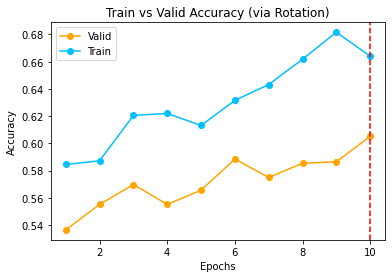

In [10]:
plt.title("Train vs Valid Accuracy (via Rotation)")
plt.plot(epoch, test_accu_rotate_m3, marker='o', color='orange', label='Valid')
plt.plot(epoch, train_accu_rotate_m3, marker='o', color='deepskyblue', label='Train')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.axvline(x=test_accu_rotate_m3.index(max(test_accu_rotate_m3))+1, color='r', linestyle='--')
plt.show()

In [11]:
print(f'Train accuracy iteration: {train_accu_rotate_m3}')
print(f'Test accuracy iteration: {test_accu_rotate_m3}')

Train accuracy iteration: [0.5845052083333333, 0.5872395833333334, 0.6205729166666667, 0.6220052083333333, 0.6131510416666667, 0.631640625, 0.6432291666666666, 0.6618489583333333, 0.681640625, 0.6640625]
Test accuracy iteration: [0.5364583333333334, 0.5552083333333333, 0.5697916666666667, 0.5552083333333333, 0.565625, 0.5885416666666666, 0.575, 0.5854166666666667, 0.5864583333333333, 0.6052083333333333]


## Crop

In [7]:
# set seed
torch.manual_seed(2)
torch.backends.cudnn.benchmark = False
torch.backends.cudnn.deterministic = True
Net3_Crop = Net3()

# move the model to GPU for speed if available
if torch.cuda.is_available():
  Net3_Crop.to('cuda')

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(Net3_Crop.parameters(), lr=0.001, momentum=0.8)

0 10 1.4002470433712007
0 20 2.9134836316108705
0 30 2.147696614265442
0 40 1.4979218125343323
0 50 1.6833914339542388
0 60 0.7384527385234833
0 70 0.7972929239273071
0 80 0.872338005900383
0 90 0.8662431597709656
0 100 0.8273428678512573
0 110 0.794011801481247
0 120 0.7727248668670654
0 130 0.6959756791591645
0 140 0.7471810758113862
0 150 0.6981489062309265
0 160 0.7312275469303131
0 170 0.6702807724475861
0 180 0.7375523805618286
0 190 0.7160630881786346
0 200 0.7000161945819855
0 210 0.733884072303772
0 220 0.702342814207077
0 230 0.6792459189891815
0 240 0.7218421101570129
0 250 0.7409469485282898
0 260 0.7231711447238922
0 270 0.7064577043056488
0 280 0.693783164024353
0 290 0.7181328952312469
0 300 0.7095898509025573
0 310 0.7021223723888397
0 320 0.6890550136566163
0 330 0.6982229173183441
0 340 0.740360951423645
0 350 0.6748759388923645
0 360 0.6720364093780518
0 370 0.7734513521194458
0 380 0.6997272849082947
0 390 0.6954563081264495
0 400 0.7400605142116546
0 410 0.70074968

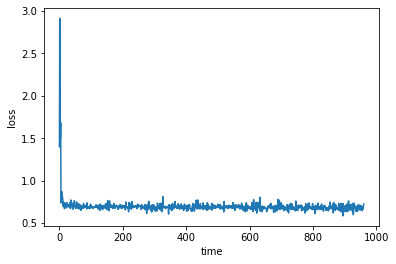

In [8]:
running_loss = 0 
printfreq = 10
l = []
t = []
k = 0
test_accu = []
train_accu = []

for epoch in range(10):
    for i, data in enumerate(Crop_Train_Loader):
        inputs, labels = data
        inputs = inputs.to('cuda')
        labels = labels.to('cuda')
        optimizer.zero_grad()
        outputs = Net3_Crop(inputs)  # forward pass 
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        if i % printfreq == printfreq-1:  
            print(epoch, i+1, running_loss / printfreq)
            k = k + 1
            l.append(running_loss / printfreq)
            t.append(k)
            running_loss = 0 

    total_test = 0  # keeps track of how many images we have processed 
    correct_test = 0  # keeps track of how many correct images our net predicts
    fname = './Model_all/seed2/Net3_Crop' + str(epoch) + '.pth'
    torch.save(Net3_Crop.state_dict(), fname)
    loaded_dict = torch.load(fname)
    Net3_Crop.load_state_dict(loaded_dict)
    with torch.no_grad():
      for i, data in enumerate(Animal_test_loader): 
        images, labels = data
        images = images.to('cuda')
        labels = labels.to('cuda')
        outputs = Net3_Crop(images)
        _, predicted = torch.max(outputs.data, 1)
        total_test += labels.size()[0]
        correct_test += (predicted == labels).sum().item()
        
    test_accu.append(correct_test/total_test)

    total_train = 0  # keeps track of how many images we have processed 
    correct_train = 0  # keeps track of how many correct images our net predicts
    with torch.no_grad():
      for i, data in enumerate(Crop_Train_Loader): 
        images, labels = data
        images = images.to('cuda')
        labels = labels.to('cuda')
        outputs = Net3_Crop(images)
        _, predicted = torch.max(outputs.data, 1)
        total_train += labels.size()[0]
        correct_train += (predicted == labels).sum().item()
        
    train_accu.append(correct_train/total_train)
# plotting
l = np.array(l)
t = np.array(t)
plt.plot(t, l)
plt.xlabel("time")
plt.ylabel("loss")
plt.show()

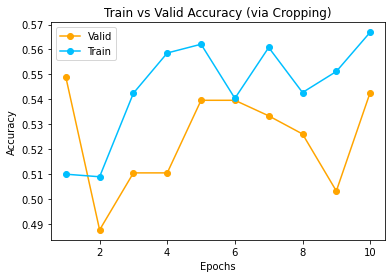

In [9]:
epoch = range(1, len(test_accu) + 1)
test_accu_crop_m3 = test_accu
train_accu_crop_m3 = train_accu
plt.title("Train vs Valid Accuracy (via Cropping)")
plt.plot(epoch, test_accu_crop_m3, marker='o', color='orange', label='Valid')
plt.plot(epoch, train_accu_crop_m3, marker='o', color='deepskyblue', label='Train')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

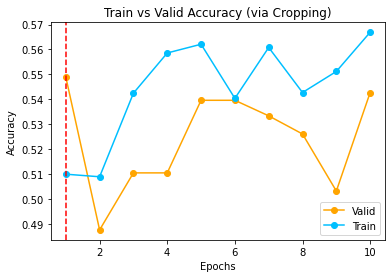

In [10]:
plt.title("Train vs Valid Accuracy (via Cropping)")
plt.plot(epoch, test_accu_crop_m3, marker='o', color='orange', label='Valid')
plt.plot(epoch, train_accu_crop_m3, marker='o', color='deepskyblue', label='Train')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.axvline(x=test_accu_crop_m3.index(max(test_accu_crop_m3))+1, color='r', linestyle='--')
plt.show()

In [11]:
print(f'Train accuracy iteration: {train_accu_crop_m3}')
print(f'Test accuracy iteration: {test_accu_crop_m3}')

Train accuracy iteration: [0.5098958333333333, 0.5088541666666667, 0.5424479166666667, 0.55859375, 0.562109375, 0.5403645833333334, 0.5608072916666667, 0.5427083333333333, 0.551171875, 0.5669270833333333]
Test accuracy iteration: [0.5489583333333333, 0.4875, 0.5104166666666666, 0.5104166666666666, 0.5395833333333333, 0.5395833333333333, 0.5333333333333333, 0.5260416666666666, 0.503125, 0.5427083333333333]


## Color

In [8]:
# set seed
torch.manual_seed(2)
torch.backends.cudnn.benchmark = False
torch.backends.cudnn.deterministic = True
Net3_Color = Net3()

# move the model to GPU for speed if available
if torch.cuda.is_available():
  Net3_Color.to('cuda')

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(Net3_Color.parameters(), lr=0.001, momentum=0.8)

0 10 1.4587374567985534
0 20 2.2086291670799256
0 30 2.9841639697551727
0 40 1.5352915287017823
0 50 0.8046770930290222
0 60 0.7209053218364716
0 70 0.7461694478988647
0 80 0.7820392310619354
0 90 0.7305635511875153
0 100 0.6772651135921478
0 110 0.7241034865379333
0 120 0.7054161369800568
0 130 0.7353447198867797
0 140 0.7400197446346283
0 150 0.7298083126544952
0 160 0.7166256427764892
0 170 0.6907414019107818
0 180 0.7665872037410736
0 190 0.7277152597904205
0 200 0.6990436017513275
0 210 0.7094533860683441
0 220 0.6556108742952347
0 230 0.6777320027351379
0 240 0.7463128447532654
0 250 0.7216957330703735
0 260 0.7061835885047912
0 270 0.6632349908351898
0 280 0.7677767157554627
0 290 0.676029485464096
0 300 0.6949715137481689
0 310 0.6972195863723755
0 320 0.6641386359930038
0 330 0.6713600337505341
0 340 0.6775178641080857
0 350 0.6546331703662872
0 360 0.7180592656135559
0 370 0.6399658888578414
0 380 0.6905928492546082
0 390 0.6852380096912384
0 400 0.7253917038440705
0 410 0.66

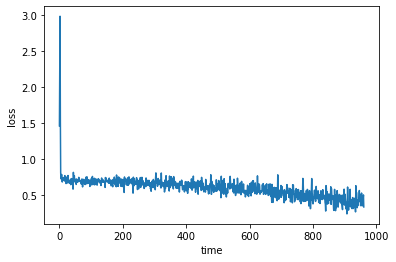

In [9]:
running_loss = 0 
printfreq = 10
l = []
t = []
k = 0
test_accu = []
train_accu = []

for epoch in range(10):
    for i, data in enumerate(Color_Train_Loader):
        inputs, labels = data
        inputs = inputs.to('cuda')
        labels = labels.to('cuda')
        optimizer.zero_grad()
        outputs = Net3_Color(inputs)  # forward pass 
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        if i % printfreq == printfreq-1:  
            print(epoch, i+1, running_loss / printfreq)
            k = k + 1
            l.append(running_loss / printfreq)
            t.append(k)
            running_loss = 0 

    total_test = 0  # keeps track of how many images we have processed 
    correct_test = 0  # keeps track of how many correct images our net predicts
    fname = './Model_all/seed2/Net3_Color' + str(epoch) + '.pth'
    torch.save(Net3_Color.state_dict(), fname)
    loaded_dict = torch.load(fname)
    Net3_Color.load_state_dict(loaded_dict)
    with torch.no_grad():
      for i, data in enumerate(Animal_test_loader): 
        images, labels = data
        images = images.to('cuda')
        labels = labels.to('cuda')
        outputs = Net3_Color(images)
        _, predicted = torch.max(outputs.data, 1)
        total_test += labels.size()[0]
        correct_test += (predicted == labels).sum().item()
        
    test_accu.append(correct_test/total_test)

    total_train = 0  # keeps track of how many images we have processed 
    correct_train = 0  # keeps track of how many correct images our net predicts
    with torch.no_grad():
      for i, data in enumerate(Color_Train_Loader): 
        images, labels = data
        images = images.to('cuda')
        labels = labels.to('cuda')
        outputs = Net3_Color(images)
        _, predicted = torch.max(outputs.data, 1)
        total_train += labels.size()[0]
        correct_train += (predicted == labels).sum().item()
        
    train_accu.append(correct_train/total_train)
# plotting
l = np.array(l)
t = np.array(t)
plt.plot(t, l)
plt.xlabel("time")
plt.ylabel("loss")
plt.show()

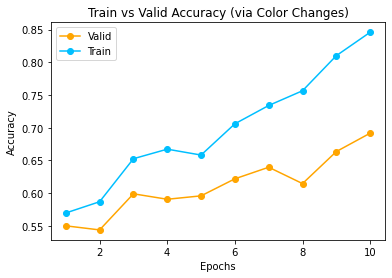

In [10]:
epoch = range(1, len(test_accu) + 1)
test_accu_color_m3 = test_accu
train_accu_color_m3 = train_accu
plt.title("Train vs Valid Accuracy (via Color Changes)")
plt.plot(epoch, test_accu_color_m3, marker='o', color='orange', label='Valid')
plt.plot(epoch, train_accu_color_m3, marker='o', color='deepskyblue', label='Train')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

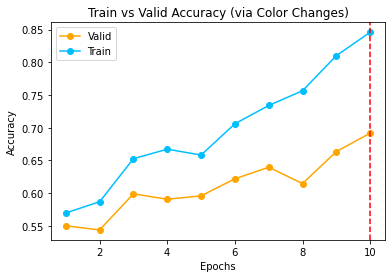

In [11]:
plt.title("Train vs Valid Accuracy (via Color Changes)")
plt.plot(epoch, test_accu_color_m3, marker='o', color='orange', label='Valid')
plt.plot(epoch, train_accu_color_m3, marker='o', color='deepskyblue', label='Train')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.axvline(x=test_accu_color_m3.index(max(test_accu_color_m3))+1, color='r', linestyle='--')
plt.show()

In [12]:
print(f'Train accuracy iteration: {train_accu_color_m3}')
print(f'Test accuracy iteration: {test_accu_color_m3}')

Train accuracy iteration: [0.5696614583333334, 0.5868489583333333, 0.6526041666666667, 0.6671875, 0.658203125, 0.7059895833333333, 0.733984375, 0.7565104166666666, 0.81015625, 0.8459635416666667]
Test accuracy iteration: [0.55, 0.54375, 0.5989583333333334, 0.590625, 0.5958333333333333, 0.621875, 0.6395833333333333, 0.6145833333333334, 0.6635416666666667, 0.6916666666666667]


## Blur

In [8]:
# set seed
torch.manual_seed(2)
torch.backends.cudnn.benchmark = False
torch.backends.cudnn.deterministic = True
Net3_Blur = Net3()

# move the model to GPU for speed if available
if torch.cuda.is_available():
  Net3_Blur.to('cuda')

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(Net3_Blur.parameters(), lr=0.001, momentum=0.8)

0 10 1.8740891575813294
0 20 2.8473168432712557
0 30 1.744658601284027
0 40 0.9310229003429413
0 50 1.2675658345222474
0 60 0.8285910248756408
0 70 0.9582852184772491
0 80 0.9173610717058182
0 90 0.7042540729045867
0 100 0.7868568778038025
0 110 0.7256150364875793
0 120 0.7188677430152893
0 130 0.7094044625759125
0 140 0.7810604631900787
0 150 0.7084040880203247
0 160 0.6834074854850769
0 170 0.700256210565567
0 180 0.6617876261472702
0 190 0.7038464069366455
0 200 0.7139577388763427
0 210 0.6533602178096771
0 220 0.7602155387401581
0 230 0.7087418496608734
0 240 0.7219958186149598
0 250 0.7419265508651733
0 260 0.6960628271102905
0 270 0.6184502571821213
0 280 0.766050374507904
0 290 0.6859994769096375
0 300 0.6414653867483139
0 310 0.6552972376346589
0 320 0.7191655576229096
0 330 0.6352985143661499
0 340 0.7241606652736664
0 350 0.6723092913627624
0 360 0.7225230038166046
0 370 0.7302719593048096
0 380 0.7298550248146057
0 390 0.6811144351959229
0 400 0.71405788064003
0 410 0.635468

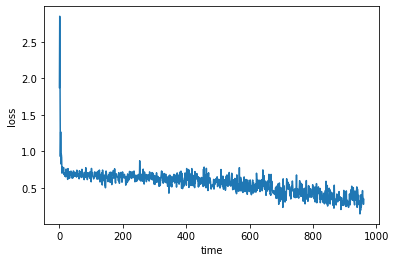

In [9]:
running_loss = 0 
printfreq = 10
l = []
t = []
k = 0
test_accu = []
train_accu = []
# torch.manual_seed(1)
for epoch in range(10):
    for i, data in enumerate(Blur_Train_Loader):
        inputs, labels = data
        inputs = inputs.to('cuda')
        labels = labels.to('cuda')
        optimizer.zero_grad()
        outputs = Net3_Blur(inputs)  # forward pass 
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        if i % printfreq == printfreq-1:  
            print(epoch, i+1, running_loss / printfreq)
            k = k + 1
            l.append(running_loss / printfreq)
            t.append(k)
            running_loss = 0 

    total_test = 0  # keeps track of how many images we have processed 
    correct_test = 0  # keeps track of how many correct images our net predicts
    fname = './Model_all/seed2/Net3_Blur' + str(epoch) + '.pth'
    torch.save(Net3_Blur.state_dict(), fname)
    loaded_dict = torch.load(fname)
    Net3_Blur.load_state_dict(loaded_dict)
    with torch.no_grad():
      for i, data in enumerate(Animal_test_loader): 
        images, labels = data
        images = images.to('cuda')
        labels = labels.to('cuda')
        outputs = Net3_Blur(images)
        _, predicted = torch.max(outputs.data, 1)
        total_test += labels.size()[0]
        correct_test += (predicted == labels).sum().item()
        
    test_accu.append(correct_test/total_test)

    total_train = 0  # keeps track of how many images we have processed 
    correct_train = 0  # keeps track of how many correct images our net predicts
    with torch.no_grad():
      for i, data in enumerate(Blur_Train_Loader): 
        images, labels = data
        images = images.to('cuda')
        labels = labels.to('cuda')
        outputs = Net3_Blur(images)
        _, predicted = torch.max(outputs.data, 1)
        total_train += labels.size()[0]
        correct_train += (predicted == labels).sum().item()
        
    train_accu.append(correct_train/total_train)
# plotting
l = np.array(l)
t = np.array(t)
plt.plot(t, l)
plt.xlabel("time")
plt.ylabel("loss")
plt.show()

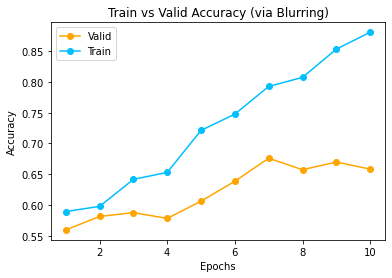

In [10]:
epoch = range(1, len(test_accu) + 1)
test_accu_blur_m3 = test_accu
train_accu_blur_m3 = train_accu
plt.title("Train vs Valid Accuracy (via Blurring)")
plt.plot(epoch, test_accu_blur_m3, marker='o', color='orange', label='Valid')
plt.plot(epoch, train_accu_blur_m3, marker='o', color='deepskyblue', label='Train')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

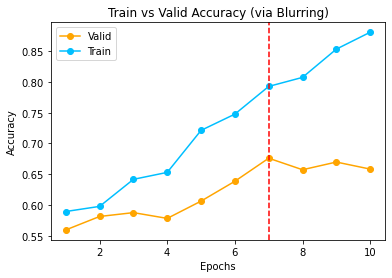

In [11]:
plt.title("Train vs Valid Accuracy (via Blurring)")
plt.plot(epoch, test_accu_blur_m3, marker='o', color='orange', label='Valid')
plt.plot(epoch, train_accu_blur_m3, marker='o', color='deepskyblue', label='Train')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.axvline(x=test_accu_blur_m3.index(max(test_accu_blur_m3))+1, color='r', linestyle='--')
plt.show()

In [12]:
print(f'Train accuracy iteration: {train_accu_blur_m3}')
print(f'Test accuracy iteration: {test_accu_blur_m3}')

Train accuracy iteration: [0.5893229166666667, 0.59765625, 0.6416666666666667, 0.6529947916666666, 0.7213541666666666, 0.7477864583333333, 0.7928385416666667, 0.8075520833333333, 0.853515625, 0.8809895833333333]
Test accuracy iteration: [0.559375, 0.58125, 0.5875, 0.578125, 0.60625, 0.6385416666666667, 0.6760416666666667, 0.6572916666666667, 0.6697916666666667, 0.6583333333333333]


## Orignal

In [8]:
# set seed
torch.manual_seed(2)
torch.backends.cudnn.benchmark = False
torch.backends.cudnn.deterministic = True
Net3_Orignal = Net3()

# move the model to GPU for speed if available
if torch.cuda.is_available():
  Net3_Orignal.to('cuda')

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(Net3_Orignal.parameters(), lr=0.001, momentum=0.8)

0 10 1.6958517134189606
0 20 1.500161075592041
0 30 2.455336385965347
0 40 0.8820435702800751
0 50 0.8381207227706909
0 60 0.9461394608020782
0 70 0.7696568667888641
0 80 0.7333011388778686
0 90 0.7440842270851136
0 100 0.7850125163793564
0 110 0.7070719420909881
0 120 0.7139033794403076
0 130 0.6808748722076416
0 140 0.707866907119751
0 150 0.6925832509994507
0 160 0.7096519768238068
0 170 0.6790064156055451
0 180 0.6966156005859375
0 190 0.7294566035270691
0 200 0.6817504048347474
0 210 0.6927054524421692
0 220 0.7007194042205811
0 230 0.7943153083324432
0 240 0.7003251612186432
0 250 0.7074538111686707
0 260 0.6585107028484345
0 270 0.6983196258544921
0 280 0.7081641614437103
0 290 0.674590241909027
0 300 0.6818008124828339
0 310 0.6603709578514099
0 320 0.7395199358463287
0 330 0.6601838052272797
0 340 0.6792124450206757
0 350 0.6504310578107834
0 360 0.7179467499256134
0 370 0.7072158575057983
0 380 0.6797831594944
0 390 0.7296628892421723
0 400 0.6459738135337829
0 410 0.70043250

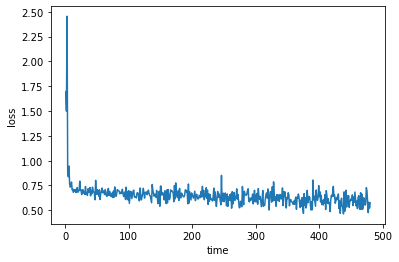

In [9]:
running_loss = 0 
printfreq = 10
l = []
t = []
k = 0
test_accu = []
train_accu = []

for epoch in range(10):
    for i, data in enumerate(Orignal_Train_Loader):
        inputs, labels = data
        inputs = inputs.to('cuda')
        labels = labels.to('cuda')
        optimizer.zero_grad()
        outputs = Net3_Orignal(inputs)  # forward pass 
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        if i % printfreq == printfreq-1:  
            print(epoch, i+1, running_loss / printfreq)
            k = k + 1
            l.append(running_loss / printfreq)
            t.append(k)
            running_loss = 0 

    total_test = 0  # keeps track of how many images we have processed 
    correct_test = 0  # keeps track of how many correct images our net predicts
    fname = './Model_all/seed2/Net3_Orignal' + str(epoch) + '.pth'
    torch.save(Net3_Orignal.state_dict(), fname)
    loaded_dict = torch.load(fname)
    Net3_Orignal.load_state_dict(loaded_dict)
    with torch.no_grad():
      for i, data in enumerate(Animal_test_loader): 
        images, labels = data
        images = images.to('cuda')
        labels = labels.to('cuda')
        outputs = Net3_Orignal(images)
        _, predicted = torch.max(outputs.data, 1)
        total_test += labels.size()[0]
        correct_test += (predicted == labels).sum().item()
        
    test_accu.append(correct_test/total_test)

    total_train = 0  # keeps track of how many images we have processed 
    correct_train = 0  # keeps track of how many correct images our net predicts
    with torch.no_grad():
      for i, data in enumerate(Orignal_Train_Loader): 
        images, labels = data
        images = images.to('cuda')
        labels = labels.to('cuda')
        outputs = Net3_Orignal(images)
        _, predicted = torch.max(outputs.data, 1)
        total_train += labels.size()[0]
        correct_train += (predicted == labels).sum().item()
        
    train_accu.append(correct_train/total_train)
# plotting
l = np.array(l)
t = np.array(t)
plt.plot(t, l)
plt.xlabel("time")
plt.ylabel("loss")
plt.show()

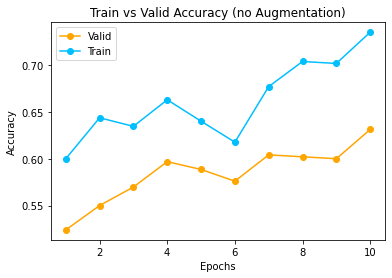

In [10]:
epoch = range(1, len(test_accu) + 1)
test_accu_orignal_m3 = test_accu
train_accu_orignal_m3 = train_accu
plt.title("Train vs Valid Accuracy (no Augmentation)")
plt.plot(epoch, test_accu_orignal_m3, marker='o', color='orange', label='Valid')
plt.plot(epoch, train_accu_orignal_m3, marker='o', color='deepskyblue', label='Train')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

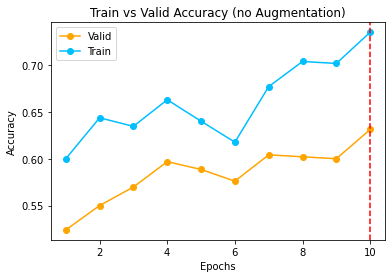

In [11]:
plt.title("Train vs Valid Accuracy (no Augmentation)")
plt.plot(epoch, test_accu_orignal_m3, marker='o', color='orange', label='Valid')
plt.plot(epoch, train_accu_orignal_m3, marker='o', color='deepskyblue', label='Train')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.axvline(x=test_accu_orignal_m3.index(max(test_accu_orignal_m3))+1, color='r', linestyle='--')
plt.show()

In [12]:
print(f'Train accuracy iteration: {train_accu_orignal_m3}')
print(f'Test accuracy iteration: {test_accu_orignal_m3}')

Train accuracy iteration: [0.6, 0.64375, 0.6346354166666667, 0.6630208333333333, 0.6401041666666667, 0.6177083333333333, 0.6770833333333334, 0.70390625, 0.7018229166666666, 0.73515625]
Test accuracy iteration: [0.5239583333333333, 0.55, 0.5697916666666667, 0.596875, 0.5885416666666666, 0.5760416666666667, 0.6041666666666666, 0.6020833333333333, 0.6, 0.63125]
